## Regression of Dynamic vortex convection with CNN

This spreadsheet takes the template from FASTAI for the BIWI dataset. I have adjusted the code to predict a linear fit on the picture in order to predict the convection speed of a dynamic stall vortex. The training data was created through manual clicking. To just use the model. Just load the stage two fit. 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import pandas as pd
import re

## Getting and converting the data

In [3]:
df = pd.read_pickle("/storage/Vortex/Training/data8141Convections")
df2 = pd.read_pickle("/storage/Vortex/Training/data8143Convections")
df = df.append(df2)
df.dropna(inplace=True)

The data we are working with is pressure, time, position. The color represent suction pressure. 
The vertical dimension represents the surface of the airfoil with the lower edge representing the leading edge. 
The horizontal dimension represents time. 
The obvious red stripe is the dynamnic stall vortex. This picture demonstrates from side view what we are looking at. https://www.google.de/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&ved=2ahUKEwj54JiTuLHiAhUC3aQKHeKqC0kQjRx6BAgBEAU&url=http%3A%2F%2Ffd.tu-berlin.de%2Fen%2Fresearch%2Fprojects%2Fwind-energy%2Fthick-airfoil-dynamic-stall%2F&psig=AOvVaw2MiiUPDGdxXuLIF8iRduuk&ust=1558693564012625

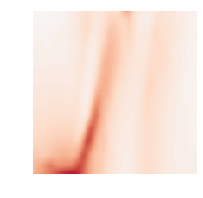

In [11]:
img = open_image('/storage/Vortex/Training/10.png')
img.show()

## Creating a dataset

In [6]:
def get_float_labels(fn):
    print(fn.stem)
    print(df.loc[int(fn.stem)].values)
    #print(type(fn))
    #m = int(re.search('(\d\d)\.', fn).group(1))
    #print(df.loc[m].values)
    return df.loc[int(fn.stem)].values

In [7]:
data = (ImageList.from_folder('/storage/Vortex/Training/')
 .split_by_rand_pct()
 .label_from_func(get_float_labels, label_cls=FloatList)
 .transform(get_transforms(do_flip=False,max_rotate=0.01,max_lighting=0.2,max_zoom=0.001,p_affine=0.001,p_lighting=0.75), size=(224,224))
 .databunch()) 
data.normalize(imagenet_stats)

693
[ 1.284664 -1.328751]
63
[ 0.752733 -0.66929 ]
570
[ 1.137321 -1.155847]
781
[ 1.405777 -1.442672]
261
[ 0.903125 -0.802761]
52
[ 0.889178 -0.808588]
755
[ 1.703153 -1.822698]
416
[ 1.135435 -1.164343]
760
[ 1.042747 -1.098607]
419
[ 1.325778 -1.428011]
459
[ 1.254955 -1.362684]
482
[ 1.175986 -1.237605]
566
[ 1.024998 -1.047776]
65
[ 0.883591 -0.820032]
66
[ 0.831301 -0.72615 ]
137
[ 0.858732 -0.79204 ]
281
[ 0.885225 -0.812648]
312
[ 0.79178  -0.708227]
595
[ 1.257089 -1.254917]
70
[ 0.897197 -0.822651]
140
[ 0.928992 -0.821069]
724
[ 1.16124  -1.236555]
154
[ 0.862636 -0.777549]
476
[ 1.293954 -1.350486]
516
[ 1.472651 -1.55054 ]
584
[ 1.262158 -1.312372]
759
[ 1.266192 -1.303494]
732
[ 1.211671 -1.300931]
337
[ 0.812167 -0.71785 ]
357
[ 0.819562 -0.723924]
771
[ 1.226891 -1.278485]
708
[ 1.227597 -1.28377 ]
563
[ 1.43957  -1.500922]
23
[ 0.840517 -0.768928]
726
[ 1.445808 -1.494553]
699
[ 1.088698 -1.121188]
479
[ 1.380217 -1.463513]
488
[ 1.288099 -1.354169]
556
[ 1.338191 -1.

[ 1.015544 -1.031258]
187
[ 0.84442 -0.77672]
170
[ 0.753095 -0.655809]
502
[ 1.147021 -1.18506 ]
487
[ 1.148952 -1.168441]
136
[ 0.912403 -0.843444]
175
[ 0.818398 -0.735125]
185
[ 0.808129 -0.708927]
320
[ 0.77969  -0.692666]
83
[ 0.796279 -0.699132]
97
[ 0.84442  -0.766271]
107
[ 0.84671  -0.779947]
106
[ 0.860266 -0.771508]
351
[ 0.936205 -0.835688]
458
[ 0.933344 -0.940986]
672
[ 1.325778 -1.378794]
287
[ 0.853872 -0.776597]
678
[ 1.311157 -1.361297]
611
[ 1.13138  -1.106962]
67
[ 0.878886 -0.797131]
291
[ 0.834197 -0.751508]
455
[ 1.08185  -1.125382]
680
[ 1.319475 -1.378262]
669
[ 1.149628 -1.208576]
756
[ 1.086774 -1.116873]
64
[ 0.932679 -0.83943 ]
588
[ 1.537497 -1.639297]
296
[ 0.964049 -0.874077]
539
[ 1.330081 -1.437319]
719
[ 1.407708 -1.496997]
559
[ 1.353398 -1.458771]
681
[ 1.338191 -1.442588]
188
[ 0.822611 -0.722906]
721
[ 1.240868 -1.29506 ]
326
[ 0.715886 -0.602177]
39
[ 0.806757 -0.757994]
252
[ 0.867644 -0.786992]
409
[ 1.188246 -1.238083]
192
[ 0.813684 -0.73390

ImageDataBunch;

Train: LabelList (515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
[ 1.284664 -1.328751],[ 0.752733 -0.66929 ],[ 1.137321 -1.155847],[ 1.405777 -1.442672],[ 0.903125 -0.802761]
Path: /storage/Vortex/Training;

Valid: LabelList (128 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
[ 1.121918 -1.181905],[ 0.851576 -0.794519],[ 1.087436 -1.144783],[ 1.221217 -1.29037 ],[ 1.013781 -0.977424]
Path: /storage/Vortex/Training;

Test: None

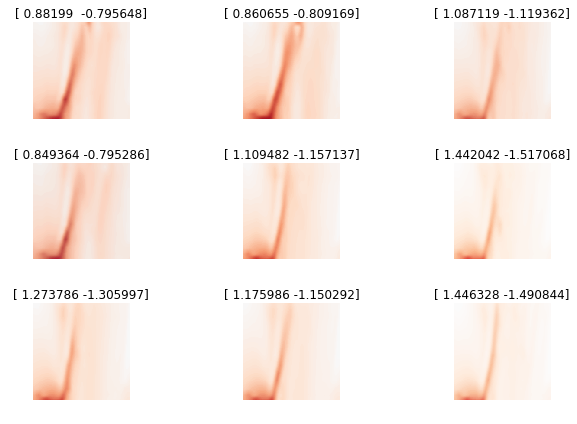

In [6]:
data.show_batch(3, figsize=(9,6))

## Train model

Train a resnet50 model. Tried other resnet sizes 50 is suitable for this case. 
Train in two stages one with frozen resnet layers and then a few epochs with all layers unfrozen. 

In [8]:
learn = cnn_learner(data, models.resnet50)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [9]:
lr = 2e-2

In [11]:
learn.fit_one_cycle(10, slice(lr))

In [12]:
learn.save('stage-1')

In [13]:
learn.load('stage-1');

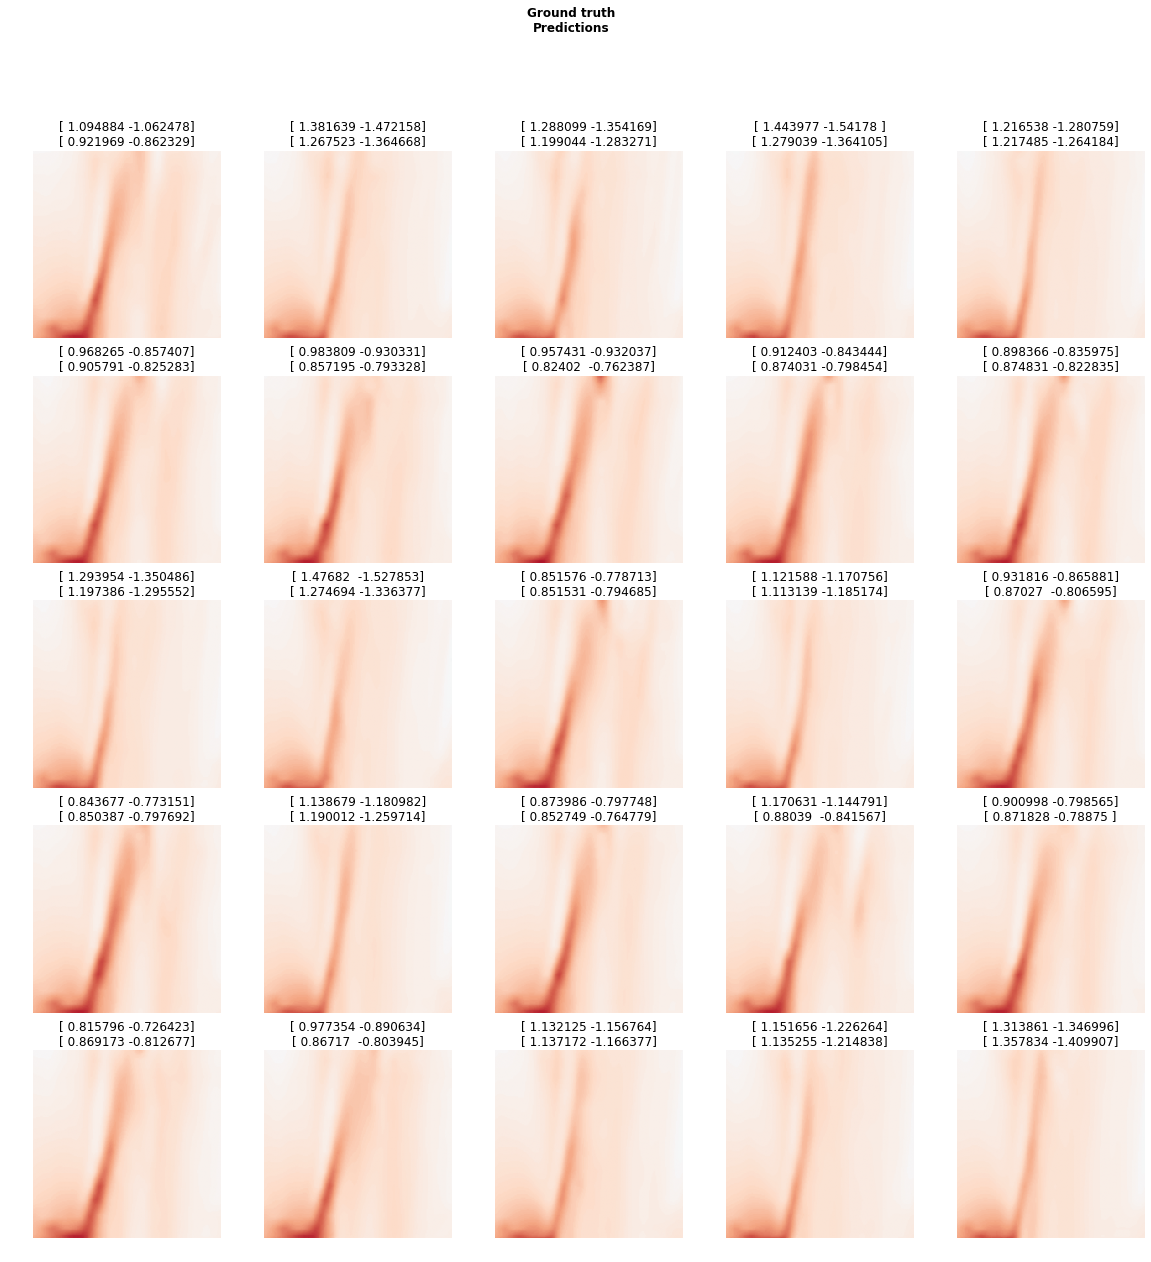

In [12]:
learn.show_results()

In [13]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


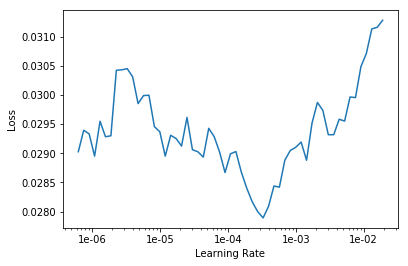

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
lr = 1e-4

In [16]:
learn.fit_one_cycle(10, slice(lr))

In [17]:
learn.save('stage-2')

In [10]:
learn.load('stage-2');

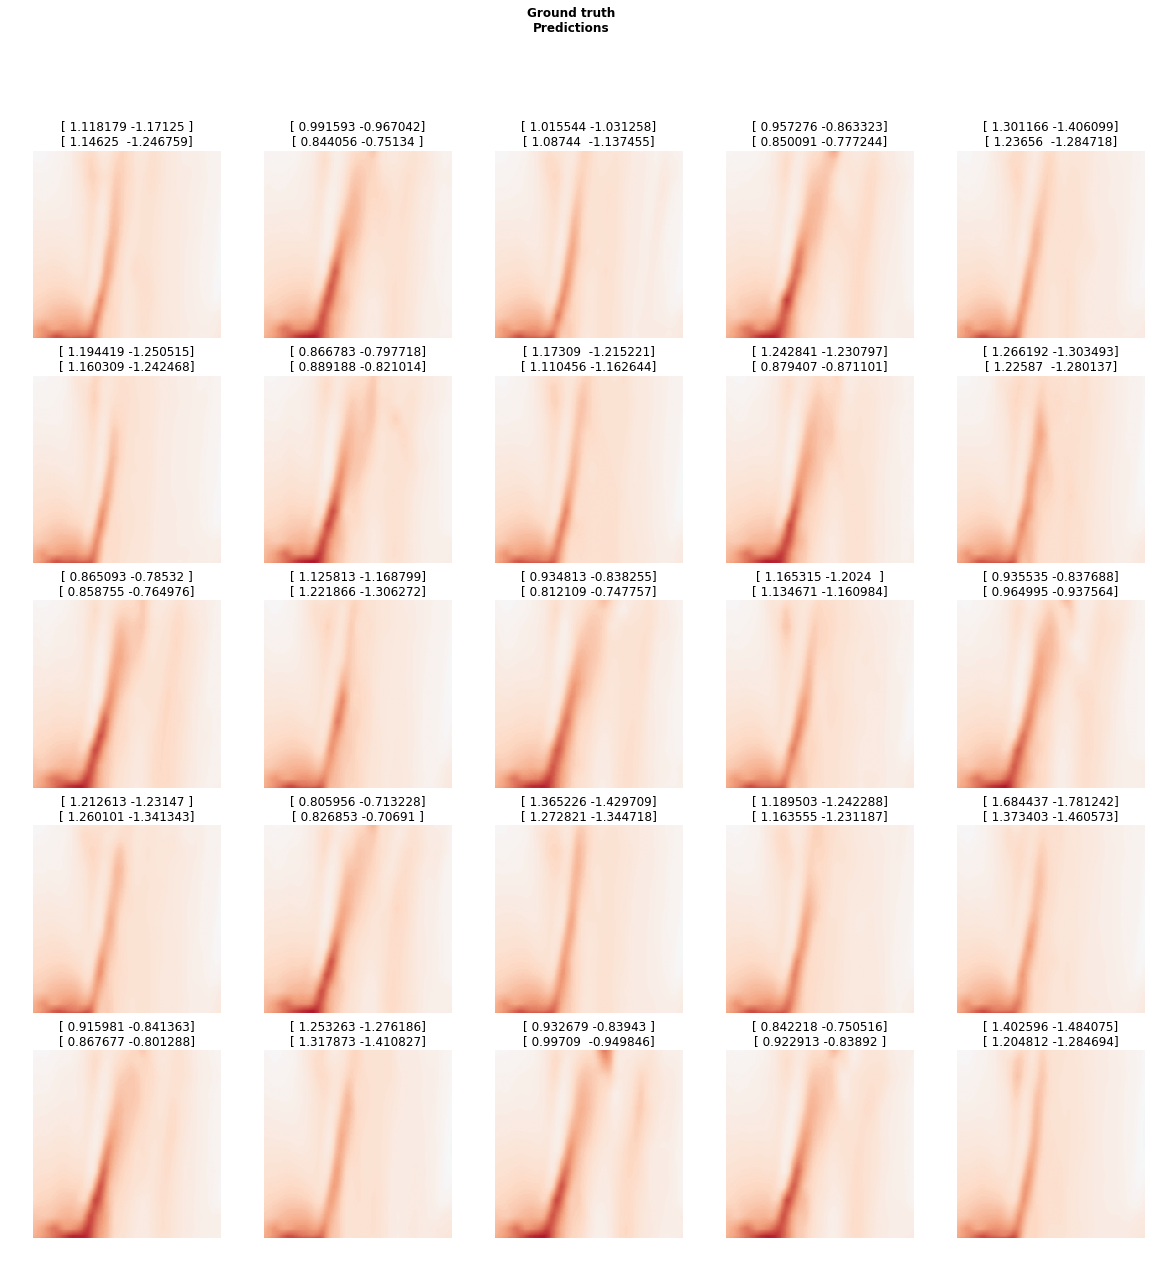

In [21]:
learn.show_results()


## Inspect the results to see if its working well. 

In [18]:
predictions = learn.get_preds(ds_type=DatasetType.Train,with_loss=True)

In [19]:
errorStats = predictions[0] - predictions[1]

(array([ 58., 154.,  24.,  33.,  98.,  85.,  47.,   9.,   2.,   2.]),
 array([0.751752, 0.847295, 0.942839, 1.038383, 1.133926, 1.22947 , 1.325014, 1.420557, 1.516101, 1.611645, 1.707188],
       dtype=float32),
 <a list of 10 Patch objects>)

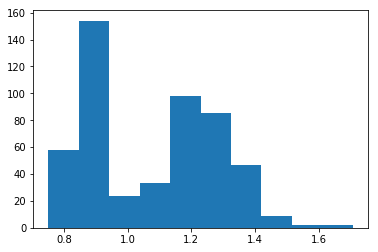

In [20]:
plt.hist(predictions[0][:,0])

(array([  1.,   2.,  12.,  53., 112.,  76.,  21.,  13., 148.,  74.]),
 array([-1.850497, -1.731364, -1.612232, -1.493099, -1.373967, -1.254834, -1.135702, -1.016569, -0.897437, -0.778304,
        -0.659172], dtype=float32),
 <a list of 10 Patch objects>)

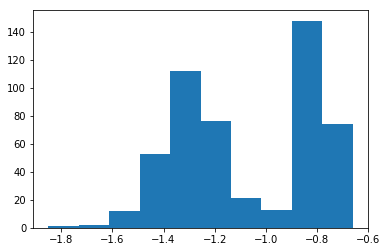

In [21]:
plt.hist(predictions[0][:,1])

(array([ 1.,  1.,  0.,  1.,  0.,  5., 18., 22., 29., 55., 70., 80., 86., 56., 39., 22., 15.,  7.,  2.,  3.]),
 array([-0.34065 , -0.311571, -0.282493, -0.253414, -0.224335, -0.195257, -0.166178, -0.137099, -0.108021, -0.078942,
        -0.049863, -0.020785,  0.008294,  0.037373,  0.066451,  0.09553 ,  0.124609,  0.153687,  0.182766,  0.211845,
         0.240923], dtype=float32),
 <a list of 20 Patch objects>)

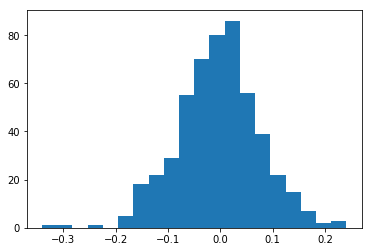

In [22]:
plt.hist(errorStats[:,0],bins = 20)

(array([ 1.,  1.,  3.,  9., 16., 37., 54., 90., 96., 64., 65., 34., 26.,  7.,  5.,  1.,  1.,  1.,  0.,  1.]),
 array([-0.327241, -0.289036, -0.250831, -0.212625, -0.17442 , -0.136215, -0.098009, -0.059804, -0.021599,  0.016606,
         0.054812,  0.093017,  0.131222,  0.169428,  0.207633,  0.245838,  0.284043,  0.322249,  0.360454,  0.398659,
         0.436865], dtype=float32),
 <a list of 20 Patch objects>)

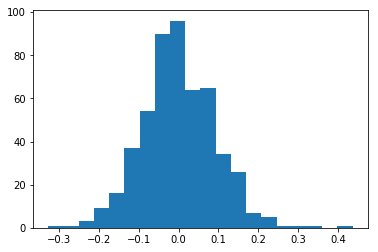

In [23]:
plt.hist(errorStats[:,1],bins = 20)

In [158]:
img = open_image('/storage/Vortex/Training/800.png')

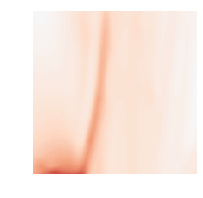

In [159]:
img.show()

In [145]:
learn.predict(img)

(FloatItem [ 1.176089 -1.209544],
 tensor([ 1.1761, -1.2095]),
 tensor([ 1.1761, -1.2095]))

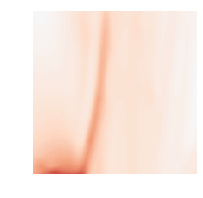

In [160]:
#img = open_image('/storage/Vortex/Answer/True459.png')
fun = lambda x : x*prediction[1][0] + prediction[1][1]*2
funReal = lambda x : x*df.loc[800].m + df.loc[800].c*2
img.show()

In [11]:
def DisplayResults(num):
    plt.figure()
    img = open_image('/storage/Vortex/Training/{}.png'.format(num))
    prediction = learn.predict(img)
    fun = lambda x : x*prediction[1][0]*np.pi/4 + prediction[1][1]*np.pi/2
    funReal = lambda x : x*df.loc[num].m*np.pi/4 + df.loc[num].c*np.pi/2
    plt.imshow(np.swapaxes(np.swapaxes(img.data.numpy(),0,1),1,2),zorder=0,extent=[0,2*np.pi,0,1])
    print([funReal(1.0641),funReal(1.46636)])
    plt.plot([1,4],[fun(1),fun(4)],zorder=1)
    plt.plot([1,4],[funReal(1),funReal(4)],zorder=1,color ='b')
    plt.gca().set_ylim([0,1])
    plt.gca().set_aspect(2*np.pi)
    plt.show()

[-0.5666935984490002, -0.2765744142157458]


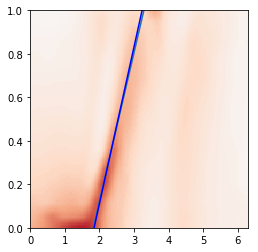

In [12]:
DisplayResults(10)

In [55]:
df.loc[10]


m    0.918290
c   -0.849344
Name: 10, dtype: float64

613
[-1.0234793769545647, -0.6237596120109694]


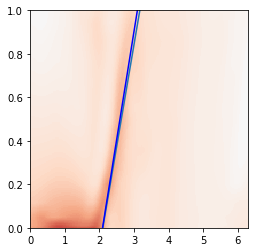

191
[-0.5082283895123667, -0.24008006777024105]


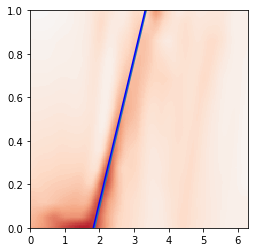

278
[-0.38739278548636047, -0.15243414281269407]


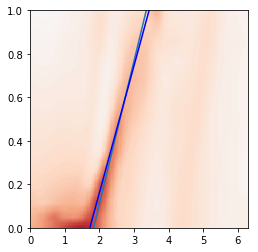

479
[-1.145375189276989, -0.709317263883976]


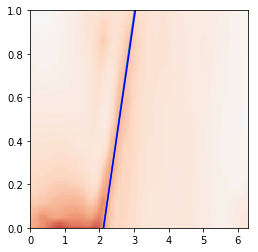

324
[-0.47928937097019686, -0.19901249436773516]


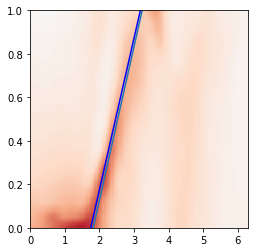

576
[-0.7904882074978933, -0.47078227662080474]


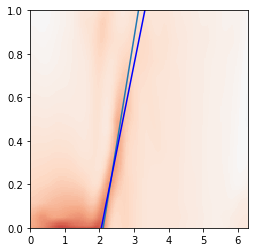

449
[-0.9868973931518208, -0.5844645981294228]


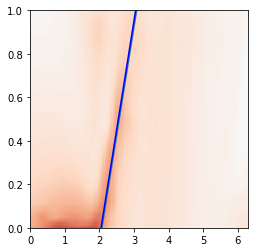

774
[-0.8963570802536401, -0.52239888020246]


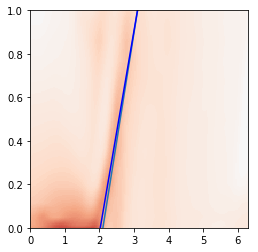

72
[-0.37788852256060723, -0.14728096586237915]


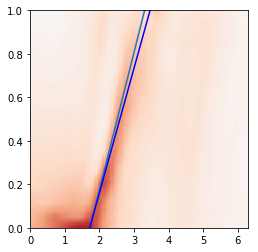

176
[-0.7538959366314514, -0.4079846015841093]


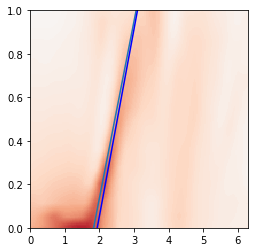

286
[-0.5177330142697962, -0.2383430898084815]


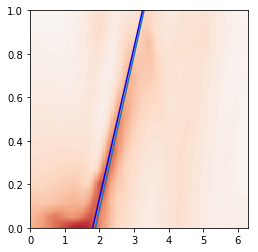

23
[-0.5053731937195953, -0.2398250981276966]


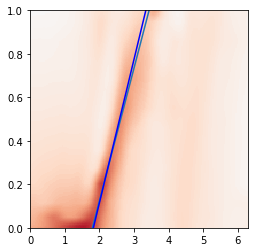

291
[-0.48329236418838406, -0.21974087081898075]


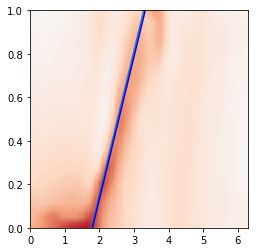

55
[-0.48998405897138475, -0.2132549909335113]


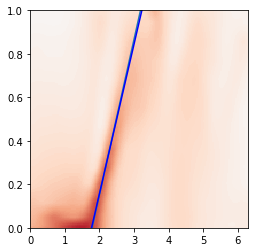

732
[-1.0308531308236943, -0.6480445867046365]


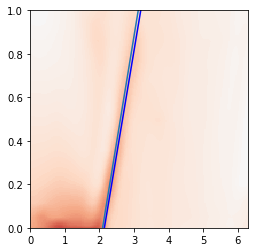

609
[-1.3445800693829106, -0.8532857094605995]


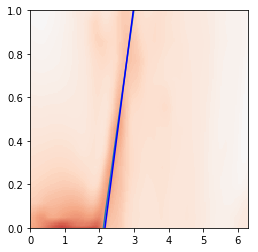

175
[-0.470761584971386, -0.2122015971582214]


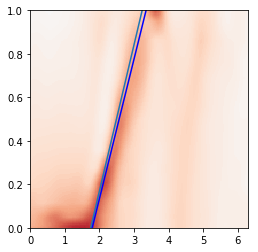

179
[-0.5329724237047796, -0.2608555068008708]


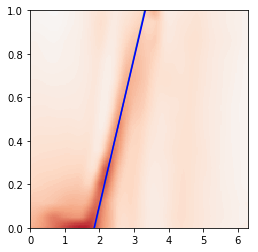

147
[-0.47011785149451424, -0.20656635812511115]


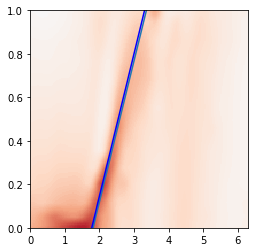

722
[-1.0648640196653956, -0.6516921472477368]


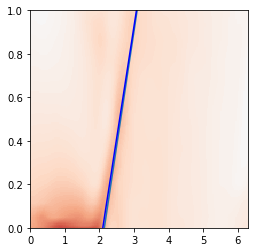

In [82]:
for num in df.sample(20).index:
    print(num)
    DisplayResults(num)

In [25]:
data = (ImageList.from_folder('/storage/Vortex/Training/')
 .split_by_rand_pct(0.0)
 .label_from_func(get_float_labels, label_cls=FloatList)
 .transform(get_transforms(do_flip=False,max_rotate=0.0,max_lighting=0.0,max_zoom=0.000,p_affine=0.000,p_lighting=0.0), size=(224,224))
 .label_from_func(get_float_labels, label_cls=FloatList)
 .databunch()) 
data.normalize(imagenet_stats)

693
[ 1.284664 -1.328751]
63
[ 0.752733 -0.66929 ]
570
[ 1.137321 -1.155847]
61
[ 0.729923 -0.62441 ]
781
[ 1.405777 -1.442672]
130
[ 0.866783 -0.797718]
261
[ 0.903125 -0.802761]
52
[ 0.889178 -0.808588]
755
[ 1.703153 -1.822698]
416
[ 1.135435 -1.164343]
760
[ 1.042747 -1.098607]
419
[ 1.325778 -1.428011]
459
[ 1.254955 -1.362684]
482
[ 1.175986 -1.237605]
566
[ 1.024998 -1.047776]
65
[ 0.883591 -0.820032]
66
[ 0.831301 -0.72615 ]
137
[ 0.858732 -0.79204 ]
281
[ 0.885225 -0.812648]
558
[ 1.421428 -1.565436]
312
[ 0.79178  -0.708227]
297
[ 0.955535 -0.856787]
595
[ 1.257089 -1.254917]
536
[ 1.221217 -1.29037 ]
70
[ 0.897197 -0.822651]
140
[ 0.928992 -0.821069]
724
[ 1.16124  -1.236555]
695
[ 1.29764  -1.358537]
154
[ 0.862636 -0.777549]
476
[ 1.293954 -1.350486]
236
[ 0.916286 -0.834844]
516
[ 1.472651 -1.55054 ]
584
[ 1.262158 -1.312372]
574
[ 1.103371 -1.153116]
307
[ 0.819759 -0.726893]
759
[ 1.266192 -1.303494]
732
[ 1.211671 -1.300931]
337
[ 0.812167 -0.71785 ]
357
[ 0.819562 -0.

91
[ 0.865093 -0.786156]
90
[ 0.867644 -0.786992]
462
[ 1.416909 -1.529502]
676
[ 1.228406 -1.287515]
194
[ 0.847232 -0.758605]
201
[ 0.905645 -0.825296]
134
[ 0.927868 -0.847463]
509
[ 1.273482 -1.325761]
710
[ 1.412242 -1.454697]
420
[ 1.254554 -1.360262]
590
[ 1.143086 -1.140872]
665
[ 1.459845 -1.527643]
265
[ 0.901669 -0.818074]
758
[ 1.42039  -1.497982]
520
[ 1.173601 -1.223997]
257
[ 0.921378 -0.877389]
213
[ 0.808129 -0.684895]
606
[ 1.159289 -1.186008]
475
[ 1.394963 -1.479169]
619
[ 1.125297 -1.176887]
632
[ 1.070553 -1.099511]
567
[ 1.209586 -1.264157]
53
[ 0.870292 -0.787861]
119
[ 0.809758 -0.718474]
123
[ 0.952954 -0.889609]
406
[ 1.121588 -1.170756]
232
[ 0.943865 -0.880819]
517
[ 1.335603 -1.439722]
77
[ 0.875907 -0.813186]
344
[ 0.912403 -0.82538 ]
96
[ 0.69772  -0.580577]
226
[ 0.905104 -0.82258 ]
189
[ 0.961065 -0.907197]
207
[ 0.860266 -0.770218]
34
[ 0.875907 -0.80325 ]
168
[ 0.845783 -0.780469]
639
[ 0.978096 -0.971252]
99
[ 0.892128 -0.821114]
585
[ 1.265199 -1.3

[ 0.931816 -0.865881]
349
[ 1.082299 -1.040364]
329
[ 0.933344 -0.873984]
259
[ 0.998057 -0.924781]
71
[ 0.950058 -0.856814]
507
[ 1.212613 -1.23147 ]
712
[ 1.124081 -1.162014]
79
[ 0.893783 -0.831877]
571
[ 1.142488 -1.176953]
109
[ 0.858732 -0.79204 ]
688
[ 1.187913 -1.249057]
76
[ 1.013781 -0.977424]
169
[ 0.884329 -0.832675]
765
[ 1.381639 -1.472158]
436
[ 1.357656 -1.476429]
687
[ 1.195563 -1.224203]
62
[ 0.729923 -0.646991]
652
[ 1.256146 -1.294798]
50
[ 0.746512 -0.649763]
253
[ 0.968265 -0.857407]
410
[ 1.102994 -1.14116 ]
664
[ 1.335224 -1.367925]
69
[ 0.878611 -0.825045]
155
[ 0.753468 -0.674962]
506
[ 1.502782 -1.583696]
666
[ 1.135435 -1.16936 ]
298
[ 0.849364 -0.762933]
553
[ 1.372254 -1.441294]
263
[ 0.807574 -0.708872]
147
[ 0.834197 -0.743121]
402
[ 1.087436 -1.144783]
432
[ 1.676849 -1.823512]
496
[ 1.044791 -1.107905]
5
[ 0.98429  -0.922956]
649
[ 1.165315 -1.2024  ]
243
[ 0.990609 -0.891187]
198
[ 0.798353 -0.710641]
117
[ 0.900756 -0.83494 ]
274
[ 0.822822 -0.72935 

773
[ 0.958918 -0.991194]
711
[ 1.37295  -1.459578]
748
[ 1.1803   -1.240242]
32
[ 0.964982 -0.901963]
285
[ 0.896396 -0.83049 ]
195
[ 0.859425 -0.777596]
346
[ 1.073416 -1.026349]
30
[ 0.988203 -0.935122]
658
[ 1.208148 -1.214782]
150
[ 0.901669 -0.824981]
690
[ 1.187913 -1.232055]
674
[ 1.236399 -1.282572]
761
[ 1.06681  -1.104166]
343
[ 0.952073 -0.866909]
289
[ 0.804404 -0.71713 ]
235
[ 0.895188 -0.828234]
791
[ 1.260775 -1.285002]
93
[ 0.873851 -0.797615]
645
[ 1.138679 -1.21115 ]
679
[ 1.29764  -1.375097]
612
[ 1.107918 -1.112478]
282
[ 0.814551 -0.752499]
29
[ 0.977354 -0.890634]
609
[ 1.555052 -1.683352]
317
[ 0.888072 -0.812584]
635
[ 1.175986 -1.150292]
284
[ 0.88548  -0.789065]
735
[ 1.034057 -1.062854]
581
[ 1.216538 -1.258178]
546
[ 1.225227 -1.270544]
728
[ 1.331035 -1.38286 ]
221
[ 0.934813 -0.838255]
7
[ 0.898366 -0.835975]


ImageDataBunch;

Train: LabelList (643 items)
x: ImageList
Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190)
y: FloatList
[ 1.284664 -1.328751],[ 0.752733 -0.66929 ],[ 1.137321 -1.155847],[ 0.729923 -0.62441 ],[ 1.405777 -1.442672]
Path: /storage/Vortex/Training;

Valid: LabelList (0 items)
x: ImageList

y: FloatList

Path: /storage/Vortex/Training;

Test: None

(FloatItem [ 1.199809 -1.261215], tensor([ 1.1998, -1.2612]), tensor([ 1.1998, -1.2612]))


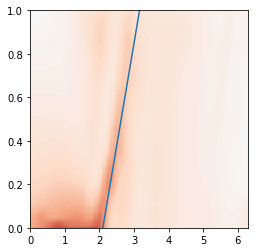

TypeError: invalid indexing of 0-dim memory

In [75]:
DisplayResults(0)

## Run new Data Through


In [76]:
def DisplayResults(num):
    plt.figure()
    img = open_image('/storage/Vortex/Infer/{}.png'.format(num))
    prediction = learn.predict(img)
    print(prediction)
    fun = lambda x : x*prediction[1][0]*np.pi/4 + prediction[1][1]*np.pi/2
    plt.imshow(np.swapaxes(np.swapaxes(img.data.numpy(),0,1),1,2),zorder=0,extent=[0,2*np.pi,0,1])
    plt.plot([1,4],[fun(1),fun(4)],zorder=1)
    #plt.plot([1,4],[funReal(1),funReal(4)],zorder=1,color ='b')
    plt.gca().set_ylim([0,1])
    plt.gca().set_aspect(2*np.pi)
    plt.savefig('/storage/Vortex/Predicted/Infered{}.png'.format(num))
    plt.show()
    return num,prediction[1].data[0],prediction[1].data[1]

(FloatItem [ 1.186776 -1.254098], tensor([ 1.1868, -1.2541]), tensor([ 1.1868, -1.2541]))


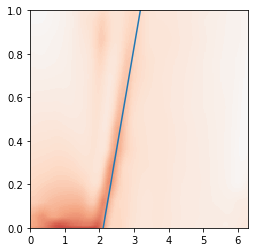

(FloatItem [ 1.275095 -1.339645], tensor([ 1.2751, -1.3396]), tensor([ 1.2751, -1.3396]))


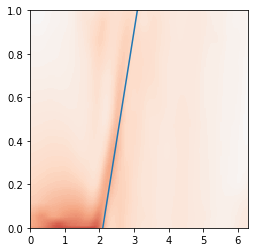

(FloatItem [ 1.337199 -1.400437], tensor([ 1.3372, -1.4004]), tensor([ 1.3372, -1.4004]))


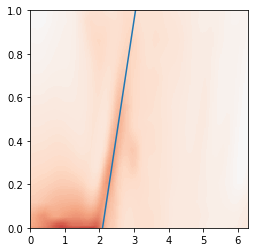

(FloatItem [ 1.244781 -1.281765], tensor([ 1.2448, -1.2818]), tensor([ 1.2448, -1.2818]))


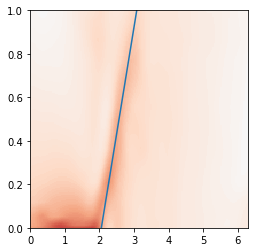

(FloatItem [ 1.417143 -1.512326], tensor([ 1.4171, -1.5123]), tensor([ 1.4171, -1.5123]))


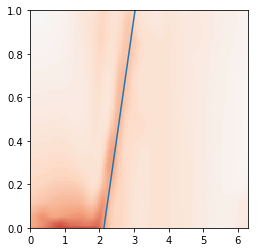

(FloatItem [ 1.16493  -1.216862], tensor([ 1.1649, -1.2169]), tensor([ 1.1649, -1.2169]))


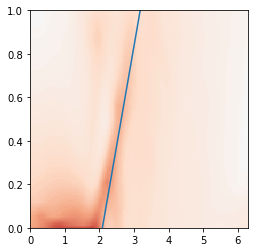

(FloatItem [ 1.336911 -1.400996], tensor([ 1.3369, -1.4010]), tensor([ 1.3369, -1.4010]))


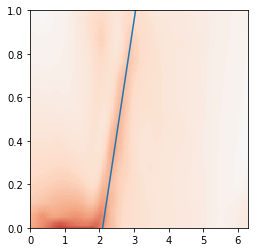

(FloatItem [ 1.29395  -1.385405], tensor([ 1.2939, -1.3854]), tensor([ 1.2939, -1.3854]))


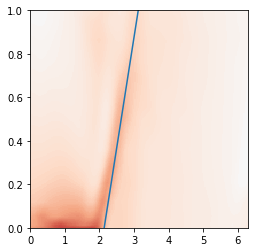

(FloatItem [ 1.162632 -1.193316], tensor([ 1.1626, -1.1933]), tensor([ 1.1626, -1.1933]))


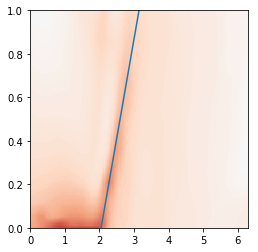

(FloatItem [ 1.244468 -1.295372], tensor([ 1.2445, -1.2954]), tensor([ 1.2445, -1.2954]))


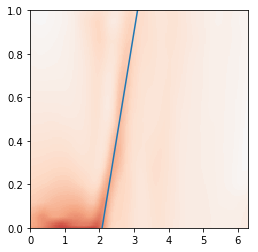

(FloatItem [ 1.311373 -1.399075], tensor([ 1.3114, -1.3991]), tensor([ 1.3114, -1.3991]))


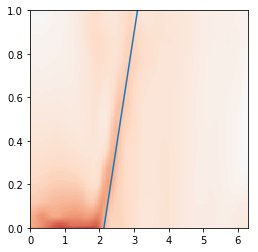

(FloatItem [ 1.273778 -1.340034], tensor([ 1.2738, -1.3400]), tensor([ 1.2738, -1.3400]))


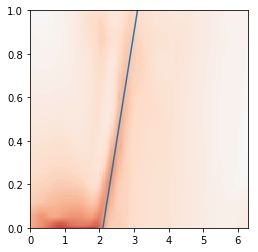

(FloatItem [ 1.175469 -1.228323], tensor([ 1.1755, -1.2283]), tensor([ 1.1755, -1.2283]))


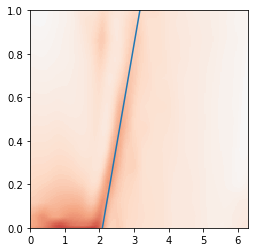

(FloatItem [ 1.222362 -1.289379], tensor([ 1.2224, -1.2894]), tensor([ 1.2224, -1.2894]))


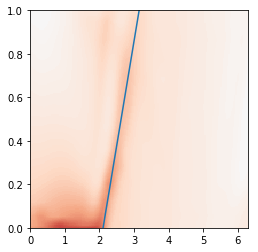

(FloatItem [ 1.221319 -1.254275], tensor([ 1.2213, -1.2543]), tensor([ 1.2213, -1.2543]))


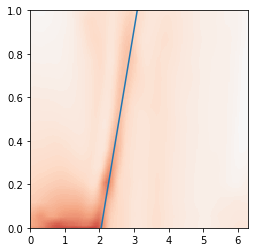

(FloatItem [ 1.136766 -1.191028], tensor([ 1.1368, -1.1910]), tensor([ 1.1368, -1.1910]))


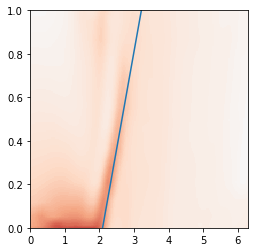

(FloatItem [ 1.19304  -1.211722], tensor([ 1.1930, -1.2117]), tensor([ 1.1930, -1.2117]))


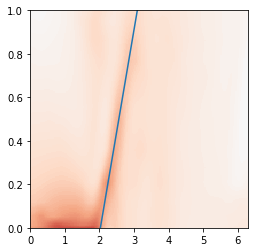

(FloatItem [ 1.205743 -1.273847], tensor([ 1.2057, -1.2738]), tensor([ 1.2057, -1.2738]))


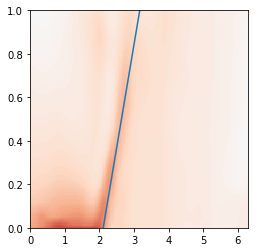

(FloatItem [ 1.311338 -1.374176], tensor([ 1.3113, -1.3742]), tensor([ 1.3113, -1.3742]))


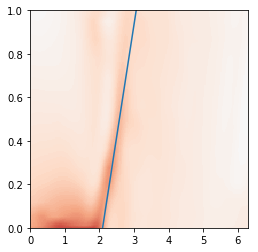

(FloatItem [ 1.20288  -1.263423], tensor([ 1.2029, -1.2634]), tensor([ 1.2029, -1.2634]))


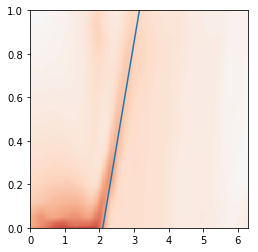

(FloatItem [ 1.224794 -1.290601], tensor([ 1.2248, -1.2906]), tensor([ 1.2248, -1.2906]))


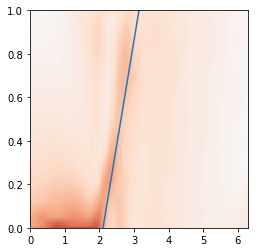

(FloatItem [ 1.252159 -1.296   ], tensor([ 1.2522, -1.2960]), tensor([ 1.2522, -1.2960]))


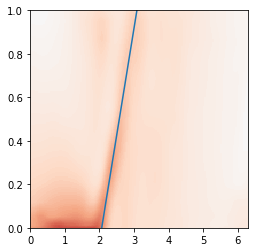

(FloatItem [ 1.334781 -1.38782 ], tensor([ 1.3348, -1.3878]), tensor([ 1.3348, -1.3878]))


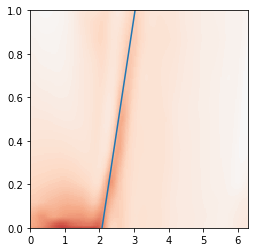

(FloatItem [ 1.294091 -1.333382], tensor([ 1.2941, -1.3334]), tensor([ 1.2941, -1.3334]))


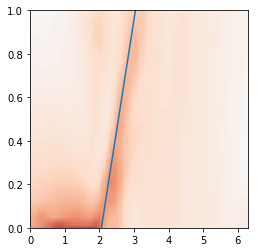

(FloatItem [ 1.204373 -1.230464], tensor([ 1.2044, -1.2305]), tensor([ 1.2044, -1.2305]))


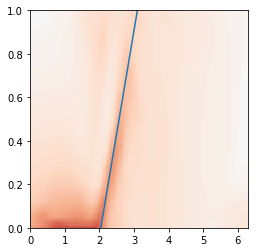

(FloatItem [ 1.378355 -1.463391], tensor([ 1.3784, -1.4634]), tensor([ 1.3784, -1.4634]))


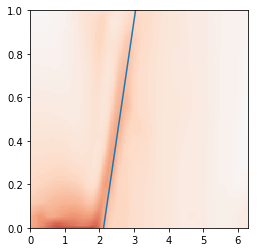

(FloatItem [ 1.174916 -1.22457 ], tensor([ 1.1749, -1.2246]), tensor([ 1.1749, -1.2246]))


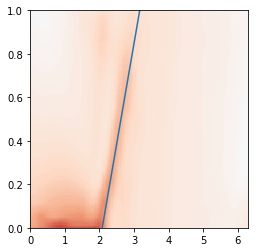

(FloatItem [ 1.316136 -1.372624], tensor([ 1.3161, -1.3726]), tensor([ 1.3161, -1.3726]))


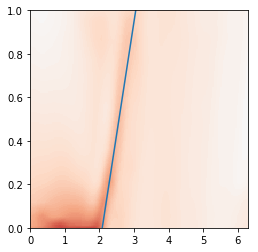

(FloatItem [ 1.277891 -1.335592], tensor([ 1.2779, -1.3356]), tensor([ 1.2779, -1.3356]))


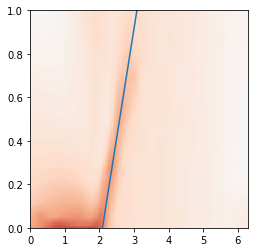

(FloatItem [ 1.116305 -1.103049], tensor([ 1.1163, -1.1030]), tensor([ 1.1163, -1.1030]))


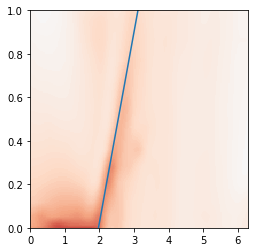

(FloatItem [ 1.16773  -1.227377], tensor([ 1.1677, -1.2274]), tensor([ 1.1677, -1.2274]))


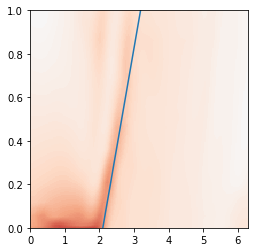

(FloatItem [ 1.376791 -1.45173 ], tensor([ 1.3768, -1.4517]), tensor([ 1.3768, -1.4517]))


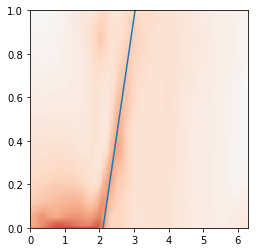

(FloatItem [ 1.400636 -1.502195], tensor([ 1.4006, -1.5022]), tensor([ 1.4006, -1.5022]))


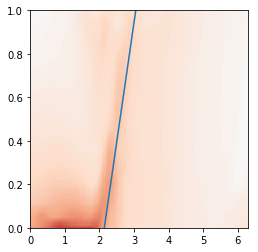

(FloatItem [ 1.365142 -1.421715], tensor([ 1.3651, -1.4217]), tensor([ 1.3651, -1.4217]))


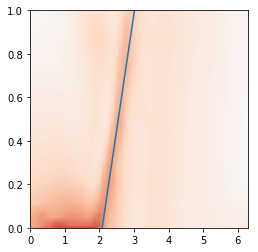

(FloatItem [ 1.093994 -1.105477], tensor([ 1.0940, -1.1055]), tensor([ 1.0940, -1.1055]))


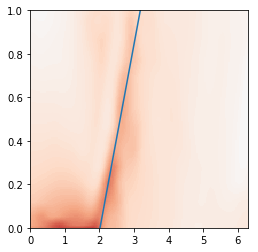

(FloatItem [ 1.237061 -1.303596], tensor([ 1.2371, -1.3036]), tensor([ 1.2371, -1.3036]))


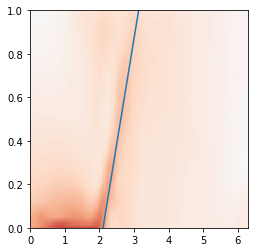

(FloatItem [ 1.203907 -1.235488], tensor([ 1.2039, -1.2355]), tensor([ 1.2039, -1.2355]))


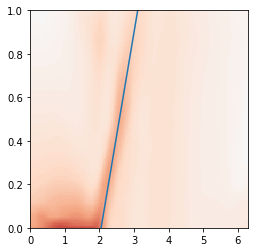

(FloatItem [ 1.178797 -1.20367 ], tensor([ 1.1788, -1.2037]), tensor([ 1.1788, -1.2037]))


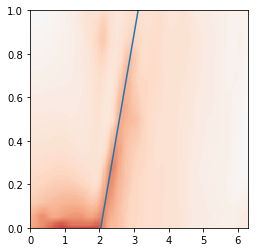

(FloatItem [ 1.155434 -1.185887], tensor([ 1.1554, -1.1859]), tensor([ 1.1554, -1.1859]))


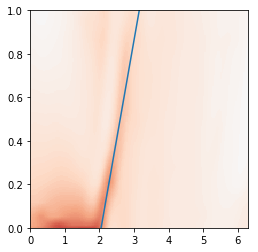

(FloatItem [ 1.405754 -1.487336], tensor([ 1.4058, -1.4873]), tensor([ 1.4058, -1.4873]))


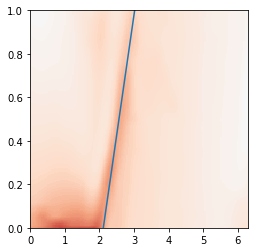

(FloatItem [ 1.218942 -1.274625], tensor([ 1.2189, -1.2746]), tensor([ 1.2189, -1.2746]))


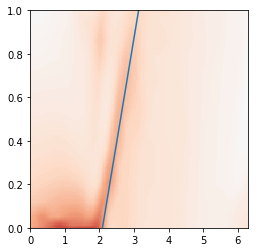

(FloatItem [ 1.208783 -1.289835], tensor([ 1.2088, -1.2898]), tensor([ 1.2088, -1.2898]))


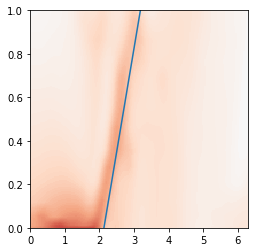

(FloatItem [ 1.306634 -1.377984], tensor([ 1.3066, -1.3780]), tensor([ 1.3066, -1.3780]))


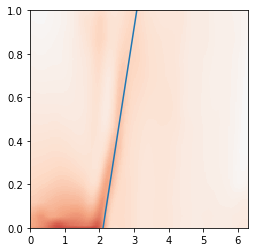

(FloatItem [ 1.138942 -1.181836], tensor([ 1.1389, -1.1818]), tensor([ 1.1389, -1.1818]))


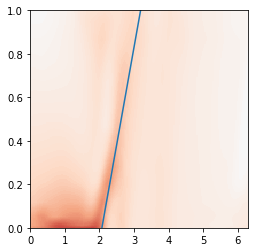

(FloatItem [ 1.18856  -1.234469], tensor([ 1.1886, -1.2345]), tensor([ 1.1886, -1.2345]))


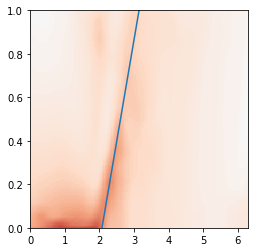

(FloatItem [ 1.31762  -1.401501], tensor([ 1.3176, -1.4015]), tensor([ 1.3176, -1.4015]))


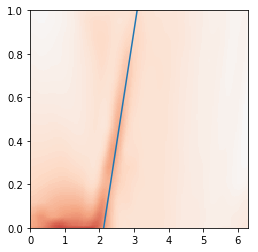

(FloatItem [ 1.191003 -1.230176], tensor([ 1.1910, -1.2302]), tensor([ 1.1910, -1.2302]))


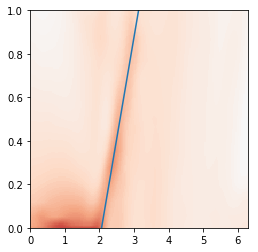

(FloatItem [ 1.247074 -1.288671], tensor([ 1.2471, -1.2887]), tensor([ 1.2471, -1.2887]))


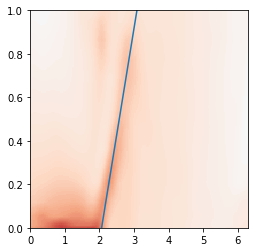

(FloatItem [ 1.386338 -1.447846], tensor([ 1.3863, -1.4478]), tensor([ 1.3863, -1.4478]))


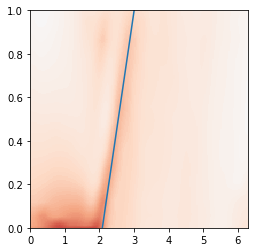

(FloatItem [ 1.263947 -1.317563], tensor([ 1.2639, -1.3176]), tensor([ 1.2639, -1.3176]))


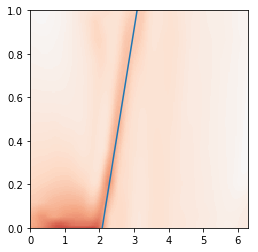

(FloatItem [ 1.283689 -1.355113], tensor([ 1.2837, -1.3551]), tensor([ 1.2837, -1.3551]))


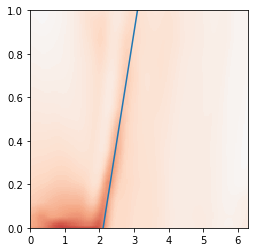

(FloatItem [ 1.196284 -1.249105], tensor([ 1.1963, -1.2491]), tensor([ 1.1963, -1.2491]))


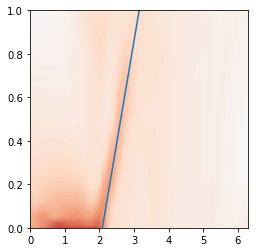

(FloatItem [ 1.319621 -1.402587], tensor([ 1.3196, -1.4026]), tensor([ 1.3196, -1.4026]))


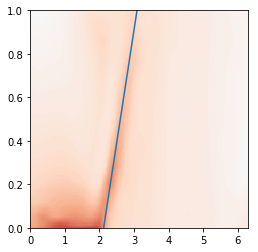

(FloatItem [ 1.239525 -1.294269], tensor([ 1.2395, -1.2943]), tensor([ 1.2395, -1.2943]))


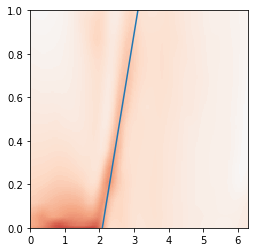

(FloatItem [ 1.181867 -1.224578], tensor([ 1.1819, -1.2246]), tensor([ 1.1819, -1.2246]))


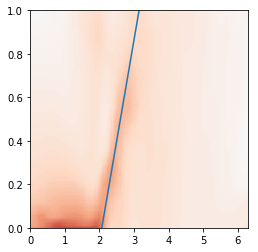

(FloatItem [ 1.262497 -1.283374], tensor([ 1.2625, -1.2834]), tensor([ 1.2625, -1.2834]))


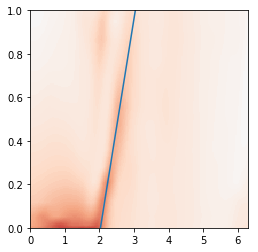

(FloatItem [ 1.186687 -1.230968], tensor([ 1.1867, -1.2310]), tensor([ 1.1867, -1.2310]))


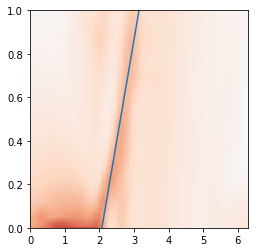

(FloatItem [ 1.195902 -1.24696 ], tensor([ 1.1959, -1.2470]), tensor([ 1.1959, -1.2470]))


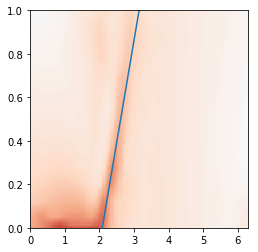

(FloatItem [ 1.32241 -1.41604], tensor([ 1.3224, -1.4160]), tensor([ 1.3224, -1.4160]))


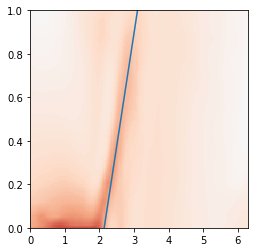

(FloatItem [ 1.150789 -1.201003], tensor([ 1.1508, -1.2010]), tensor([ 1.1508, -1.2010]))


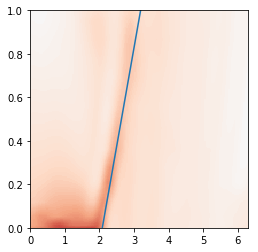

(FloatItem [ 1.221508 -1.268223], tensor([ 1.2215, -1.2682]), tensor([ 1.2215, -1.2682]))


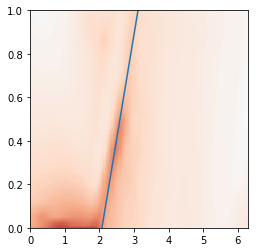

(FloatItem [ 1.268338 -1.327238], tensor([ 1.2683, -1.3272]), tensor([ 1.2683, -1.3272]))


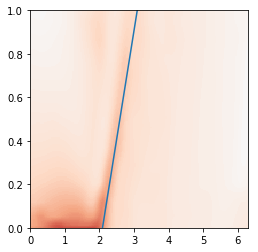

(FloatItem [ 1.239433 -1.266057], tensor([ 1.2394, -1.2661]), tensor([ 1.2394, -1.2661]))


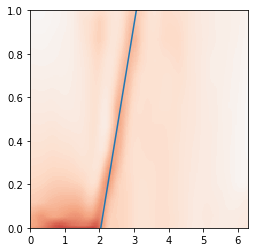

(FloatItem [ 1.385289 -1.455598], tensor([ 1.3853, -1.4556]), tensor([ 1.3853, -1.4556]))


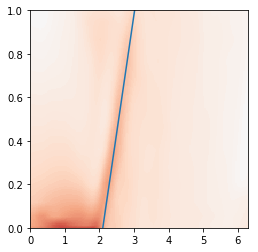

(FloatItem [ 1.192333 -1.218788], tensor([ 1.1923, -1.2188]), tensor([ 1.1923, -1.2188]))


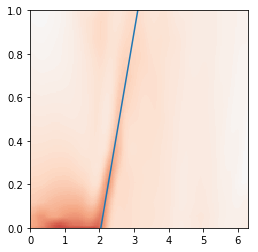

(FloatItem [ 1.276735 -1.339067], tensor([ 1.2767, -1.3391]), tensor([ 1.2767, -1.3391]))


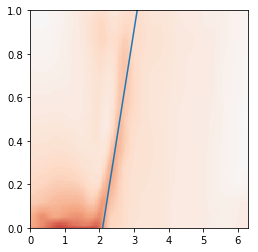

(FloatItem [ 1.127422 -1.180173], tensor([ 1.1274, -1.1802]), tensor([ 1.1274, -1.1802]))


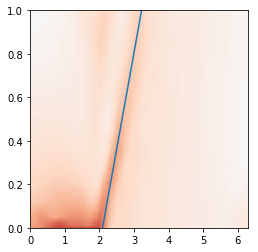

(FloatItem [ 1.326298 -1.410097], tensor([ 1.3263, -1.4101]), tensor([ 1.3263, -1.4101]))


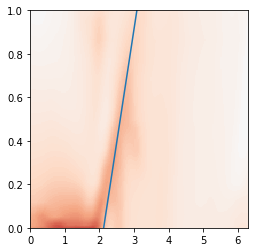

(FloatItem [ 1.500921 -1.602184], tensor([ 1.5009, -1.6022]), tensor([ 1.5009, -1.6022]))


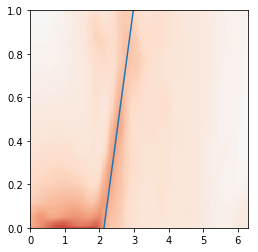

(FloatItem [ 1.508936 -1.606712], tensor([ 1.5089, -1.6067]), tensor([ 1.5089, -1.6067]))


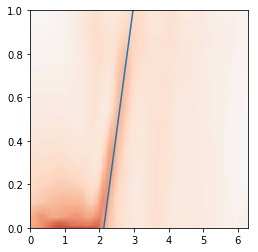

(FloatItem [ 1.149828 -1.198891], tensor([ 1.1498, -1.1989]), tensor([ 1.1498, -1.1989]))


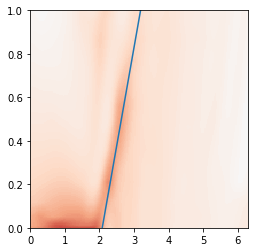

(FloatItem [ 1.423605 -1.491331], tensor([ 1.4236, -1.4913]), tensor([ 1.4236, -1.4913]))


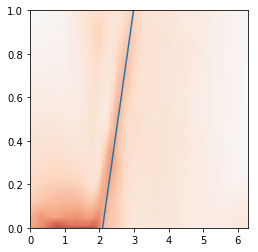

(FloatItem [ 1.353542 -1.417974], tensor([ 1.3535, -1.4180]), tensor([ 1.3535, -1.4180]))


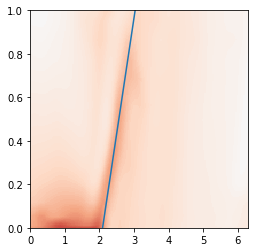

(FloatItem [ 1.174929 -1.204183], tensor([ 1.1749, -1.2042]), tensor([ 1.1749, -1.2042]))


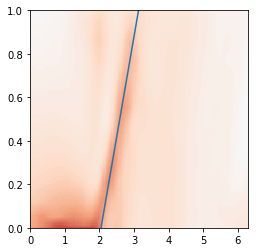

(FloatItem [ 1.222507 -1.288053], tensor([ 1.2225, -1.2881]), tensor([ 1.2225, -1.2881]))


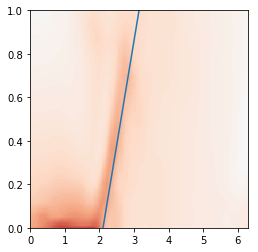

(FloatItem [ 1.062408 -1.097991], tensor([ 1.0624, -1.0980]), tensor([ 1.0624, -1.0980]))


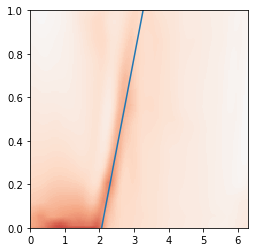

(FloatItem [ 1.375033 -1.472643], tensor([ 1.3750, -1.4726]), tensor([ 1.3750, -1.4726]))


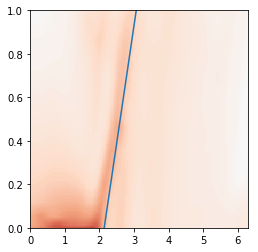

(FloatItem [ 1.331187 -1.396752], tensor([ 1.3312, -1.3968]), tensor([ 1.3312, -1.3968]))


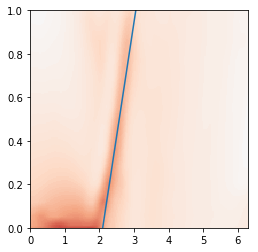

(FloatItem [ 1.239845 -1.301693], tensor([ 1.2398, -1.3017]), tensor([ 1.2398, -1.3017]))


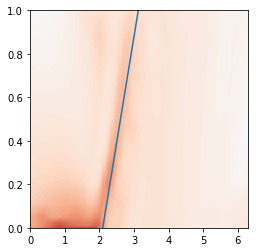

(FloatItem [ 1.227113 -1.330005], tensor([ 1.2271, -1.3300]), tensor([ 1.2271, -1.3300]))


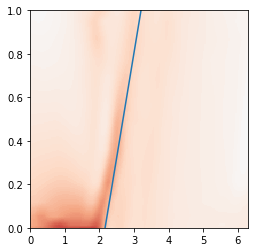

(FloatItem [ 1.211828 -1.298216], tensor([ 1.2118, -1.2982]), tensor([ 1.2118, -1.2982]))


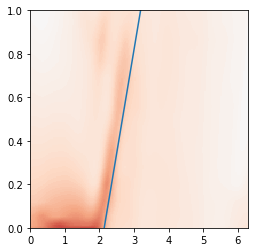

(FloatItem [ 1.277968 -1.317002], tensor([ 1.2780, -1.3170]), tensor([ 1.2780, -1.3170]))


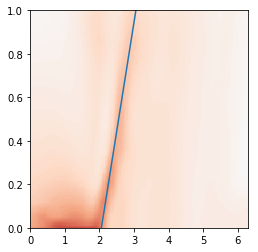

(FloatItem [ 1.145733 -1.178181], tensor([ 1.1457, -1.1782]), tensor([ 1.1457, -1.1782]))


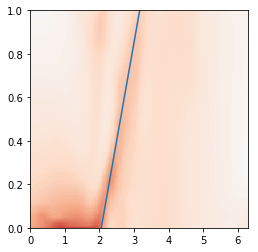

(FloatItem [ 1.190764 -1.239911], tensor([ 1.1908, -1.2399]), tensor([ 1.1908, -1.2399]))


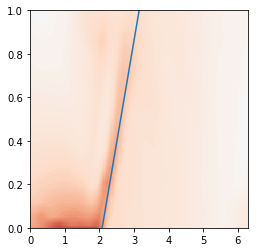

(FloatItem [ 1.152297 -1.193595], tensor([ 1.1523, -1.1936]), tensor([ 1.1523, -1.1936]))


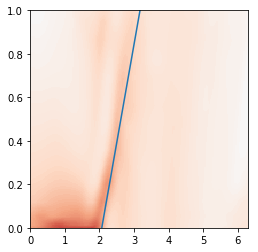

(FloatItem [ 1.338701 -1.440808], tensor([ 1.3387, -1.4408]), tensor([ 1.3387, -1.4408]))


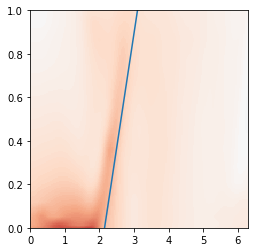

(FloatItem [ 1.239178 -1.304388], tensor([ 1.2392, -1.3044]), tensor([ 1.2392, -1.3044]))


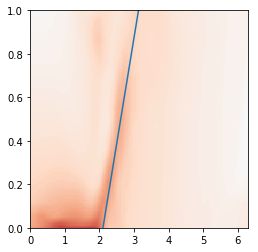

(FloatItem [ 1.346618 -1.427535], tensor([ 1.3466, -1.4275]), tensor([ 1.3466, -1.4275]))


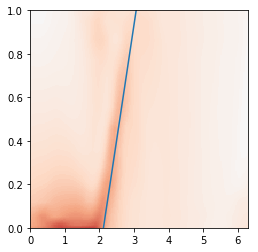

(FloatItem [ 1.157504 -1.185738], tensor([ 1.1575, -1.1857]), tensor([ 1.1575, -1.1857]))


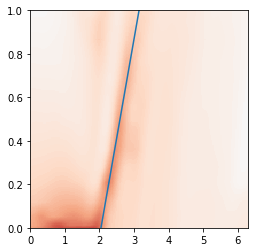

(FloatItem [ 1.148612 -1.178258], tensor([ 1.1486, -1.1783]), tensor([ 1.1486, -1.1783]))


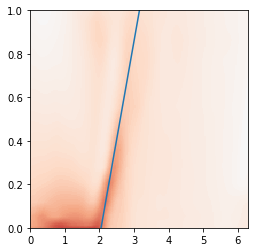

(FloatItem [ 1.279743 -1.346844], tensor([ 1.2797, -1.3468]), tensor([ 1.2797, -1.3468]))


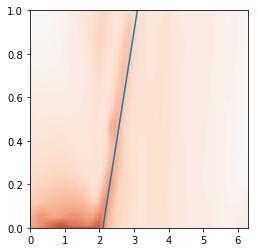

(FloatItem [ 1.086737 -1.115543], tensor([ 1.0867, -1.1155]), tensor([ 1.0867, -1.1155]))


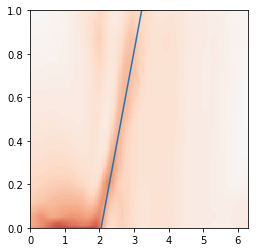

(FloatItem [ 1.306672 -1.367227], tensor([ 1.3067, -1.3672]), tensor([ 1.3067, -1.3672]))


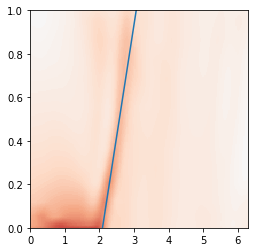

(FloatItem [ 1.249908 -1.28676 ], tensor([ 1.2499, -1.2868]), tensor([ 1.2499, -1.2868]))


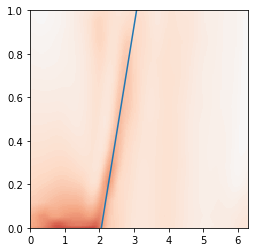

(FloatItem [ 1.040672 -1.085916], tensor([ 1.0407, -1.0859]), tensor([ 1.0407, -1.0859]))


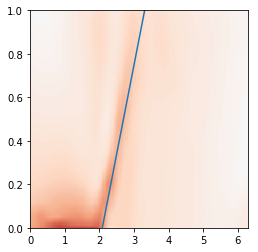

(FloatItem [ 1.231106 -1.272362], tensor([ 1.2311, -1.2724]), tensor([ 1.2311, -1.2724]))


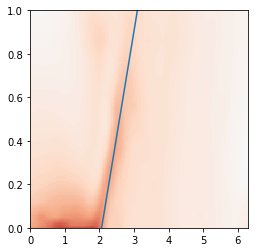

(FloatItem [ 1.152374 -1.184565], tensor([ 1.1524, -1.1846]), tensor([ 1.1524, -1.1846]))


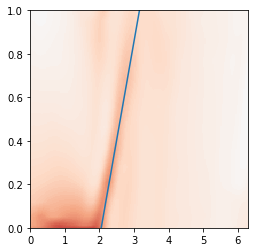

(FloatItem [ 1.217471 -1.285203], tensor([ 1.2175, -1.2852]), tensor([ 1.2175, -1.2852]))


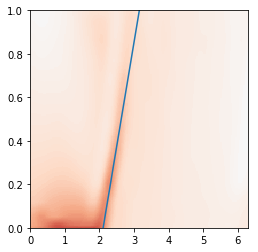

(FloatItem [ 1.15726  -1.206621], tensor([ 1.1573, -1.2066]), tensor([ 1.1573, -1.2066]))


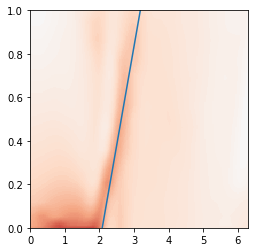

(FloatItem [ 1.11848  -1.177546], tensor([ 1.1185, -1.1775]), tensor([ 1.1185, -1.1775]))


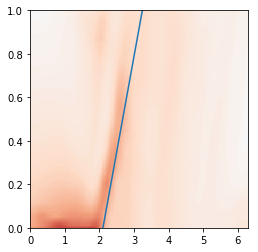

(FloatItem [ 1.196795 -1.257735], tensor([ 1.1968, -1.2577]), tensor([ 1.1968, -1.2577]))


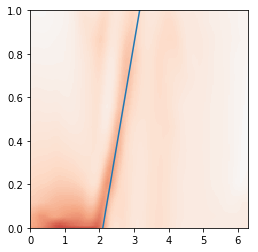

(FloatItem [ 1.190351 -1.208602], tensor([ 1.1904, -1.2086]), tensor([ 1.1904, -1.2086]))


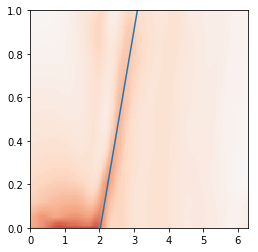

(FloatItem [ 1.161835 -1.231862], tensor([ 1.1618, -1.2319]), tensor([ 1.1618, -1.2319]))


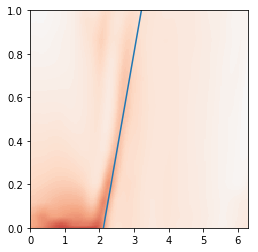

(FloatItem [ 1.041035 -1.091602], tensor([ 1.0410, -1.0916]), tensor([ 1.0410, -1.0916]))


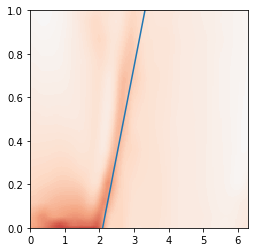

(FloatItem [ 1.173418 -1.225262], tensor([ 1.1734, -1.2253]), tensor([ 1.1734, -1.2253]))


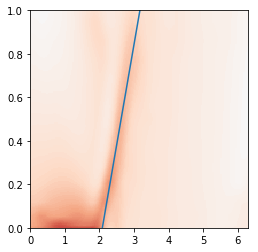

(FloatItem [ 1.331015 -1.394311], tensor([ 1.3310, -1.3943]), tensor([ 1.3310, -1.3943]))


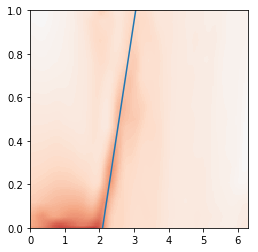

(FloatItem [ 1.364224 -1.42867 ], tensor([ 1.3642, -1.4287]), tensor([ 1.3642, -1.4287]))


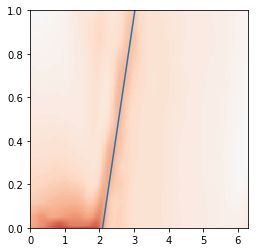

(FloatItem [ 1.209449 -1.293709], tensor([ 1.2094, -1.2937]), tensor([ 1.2094, -1.2937]))


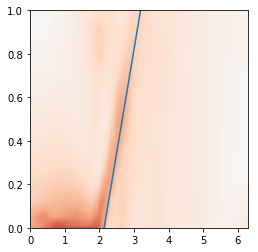

(FloatItem [ 1.297424 -1.382325], tensor([ 1.2974, -1.3823]), tensor([ 1.2974, -1.3823]))


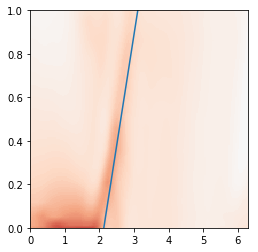

(FloatItem [ 1.249338 -1.26787 ], tensor([ 1.2493, -1.2679]), tensor([ 1.2493, -1.2679]))


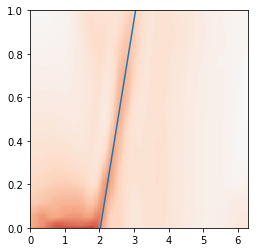

(FloatItem [ 1.40922  -1.496327], tensor([ 1.4092, -1.4963]), tensor([ 1.4092, -1.4963]))


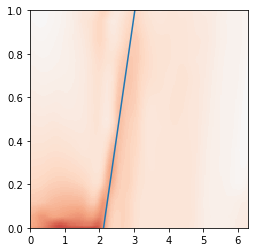

(FloatItem [ 1.435776 -1.513137], tensor([ 1.4358, -1.5131]), tensor([ 1.4358, -1.5131]))


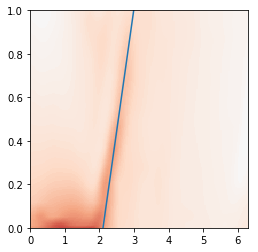

(FloatItem [ 1.236917 -1.297265], tensor([ 1.2369, -1.2973]), tensor([ 1.2369, -1.2973]))


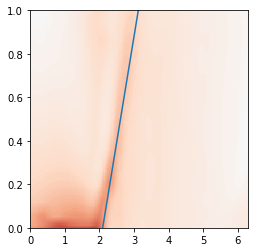

(FloatItem [ 1.16228  -1.215647], tensor([ 1.1623, -1.2156]), tensor([ 1.1623, -1.2156]))


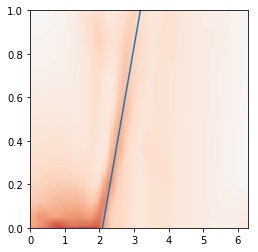

(FloatItem [ 1.255238 -1.317344], tensor([ 1.2552, -1.3173]), tensor([ 1.2552, -1.3173]))


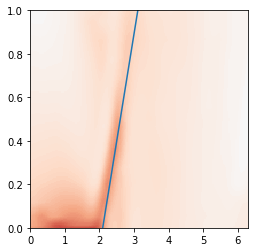

(FloatItem [ 1.268823 -1.333665], tensor([ 1.2688, -1.3337]), tensor([ 1.2688, -1.3337]))


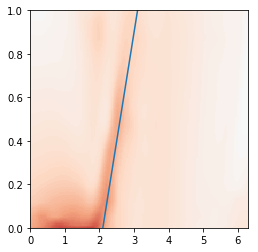

(FloatItem [ 1.345262 -1.411289], tensor([ 1.3453, -1.4113]), tensor([ 1.3453, -1.4113]))


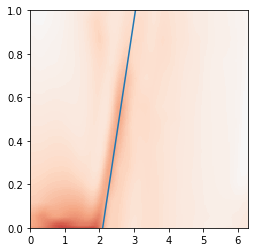

(FloatItem [ 1.136479 -1.165879], tensor([ 1.1365, -1.1659]), tensor([ 1.1365, -1.1659]))


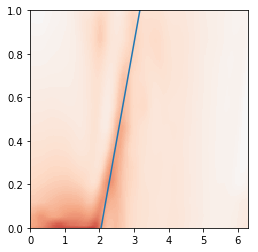

(FloatItem [ 1.438272 -1.525235], tensor([ 1.4383, -1.5252]), tensor([ 1.4383, -1.5252]))


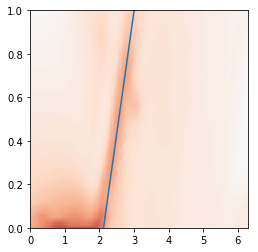

(FloatItem [ 1.228457 -1.253607], tensor([ 1.2285, -1.2536]), tensor([ 1.2285, -1.2536]))


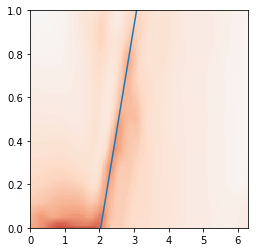

(FloatItem [ 1.084168 -1.097739], tensor([ 1.0842, -1.0977]), tensor([ 1.0842, -1.0977]))


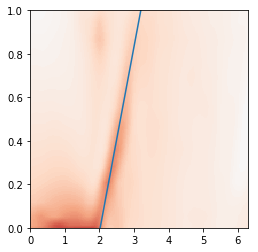

(FloatItem [ 1.175023 -1.199156], tensor([ 1.1750, -1.1992]), tensor([ 1.1750, -1.1992]))


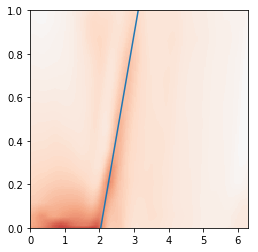

(FloatItem [ 1.41759  -1.502483], tensor([ 1.4176, -1.5025]), tensor([ 1.4176, -1.5025]))


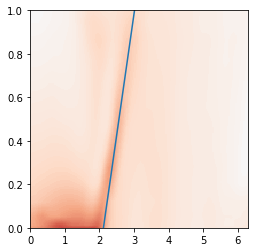

(FloatItem [ 1.327951 -1.382714], tensor([ 1.3280, -1.3827]), tensor([ 1.3280, -1.3827]))


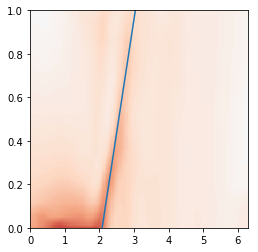

(FloatItem [ 1.12683  -1.168477], tensor([ 1.1268, -1.1685]), tensor([ 1.1268, -1.1685]))


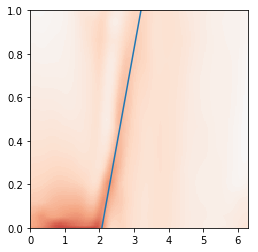

(FloatItem [ 1.482357 -1.614545], tensor([ 1.4824, -1.6145]), tensor([ 1.4824, -1.6145]))


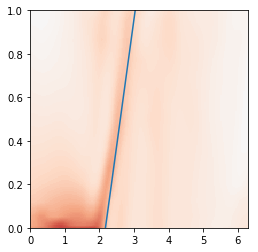

(FloatItem [ 1.539475 -1.655183], tensor([ 1.5395, -1.6552]), tensor([ 1.5395, -1.6552]))


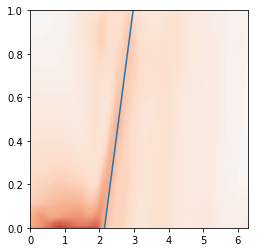

(FloatItem [ 1.249204 -1.296499], tensor([ 1.2492, -1.2965]), tensor([ 1.2492, -1.2965]))


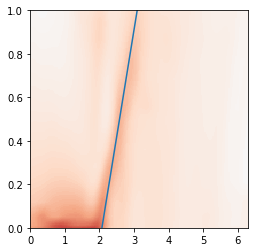

(FloatItem [ 1.148327 -1.163602], tensor([ 1.1483, -1.1636]), tensor([ 1.1483, -1.1636]))


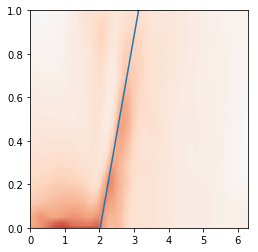

(FloatItem [ 1.317717 -1.387257], tensor([ 1.3177, -1.3873]), tensor([ 1.3177, -1.3873]))


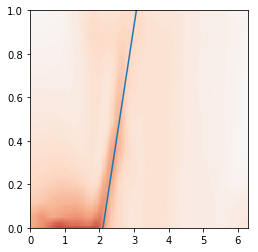

(FloatItem [ 1.257046 -1.301062], tensor([ 1.2570, -1.3011]), tensor([ 1.2570, -1.3011]))


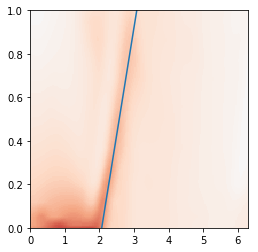

(FloatItem [ 1.247294 -1.310756], tensor([ 1.2473, -1.3108]), tensor([ 1.2473, -1.3108]))


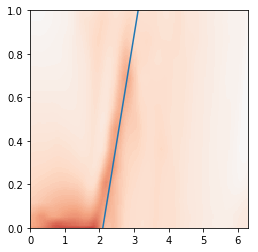

(FloatItem [ 1.455517 -1.557095], tensor([ 1.4555, -1.5571]), tensor([ 1.4555, -1.5571]))


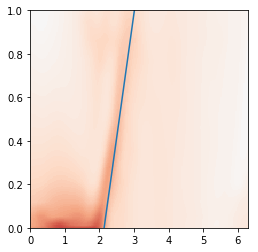

(FloatItem [ 1.380725 -1.487874], tensor([ 1.3807, -1.4879]), tensor([ 1.3807, -1.4879]))


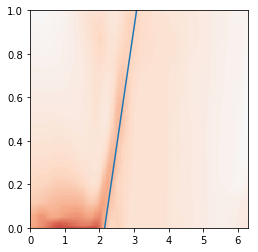

(FloatItem [ 1.103903 -1.11952 ], tensor([ 1.1039, -1.1195]), tensor([ 1.1039, -1.1195]))


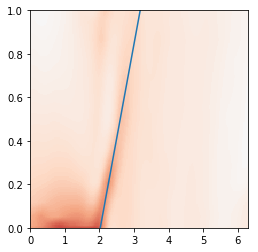

(FloatItem [ 1.261576 -1.324917], tensor([ 1.2616, -1.3249]), tensor([ 1.2616, -1.3249]))


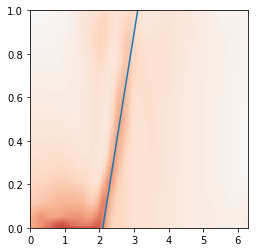

(FloatItem [ 1.205247 -1.245981], tensor([ 1.2052, -1.2460]), tensor([ 1.2052, -1.2460]))


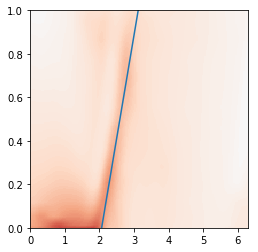

(FloatItem [ 1.191659 -1.266781], tensor([ 1.1917, -1.2668]), tensor([ 1.1917, -1.2668]))


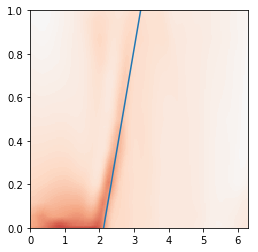

(FloatItem [ 1.289401 -1.335058], tensor([ 1.2894, -1.3351]), tensor([ 1.2894, -1.3351]))


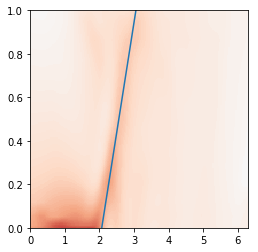

(FloatItem [ 1.334066 -1.417954], tensor([ 1.3341, -1.4180]), tensor([ 1.3341, -1.4180]))


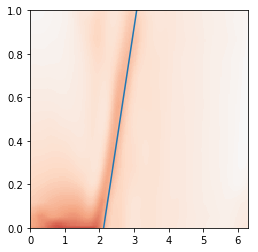

(FloatItem [ 1.328268 -1.406417], tensor([ 1.3283, -1.4064]), tensor([ 1.3283, -1.4064]))


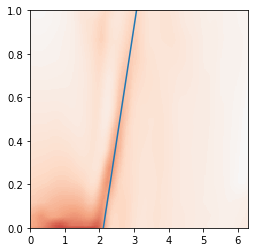

(FloatItem [ 1.271715 -1.343688], tensor([ 1.2717, -1.3437]), tensor([ 1.2717, -1.3437]))


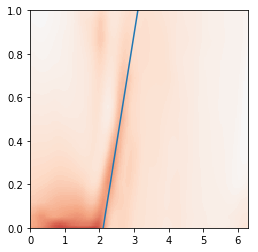

(FloatItem [ 1.307926 -1.374939], tensor([ 1.3079, -1.3749]), tensor([ 1.3079, -1.3749]))


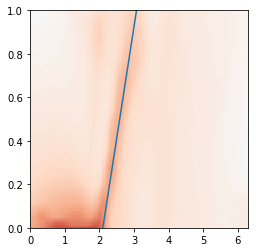

(FloatItem [ 1.322563 -1.413419], tensor([ 1.3226, -1.4134]), tensor([ 1.3226, -1.4134]))


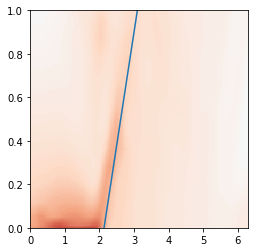

(FloatItem [ 1.365028 -1.44749 ], tensor([ 1.3650, -1.4475]), tensor([ 1.3650, -1.4475]))


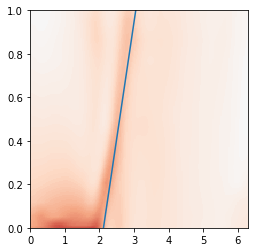

(FloatItem [ 1.219826 -1.279234], tensor([ 1.2198, -1.2792]), tensor([ 1.2198, -1.2792]))


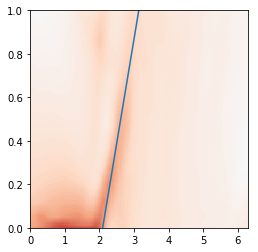

(FloatItem [ 1.354169 -1.418335], tensor([ 1.3542, -1.4183]), tensor([ 1.3542, -1.4183]))


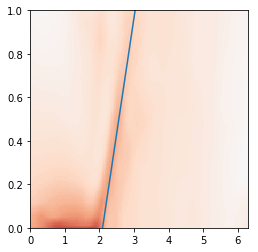

(FloatItem [ 1.155397 -1.183263], tensor([ 1.1554, -1.1833]), tensor([ 1.1554, -1.1833]))


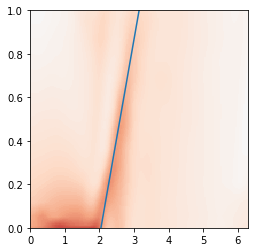

(FloatItem [ 1.122486 -1.149504], tensor([ 1.1225, -1.1495]), tensor([ 1.1225, -1.1495]))


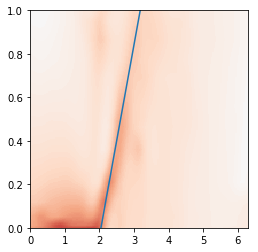

(FloatItem [ 1.206488 -1.248793], tensor([ 1.2065, -1.2488]), tensor([ 1.2065, -1.2488]))


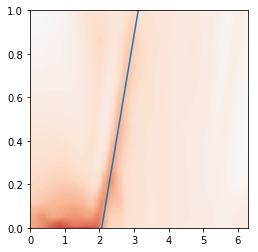

(FloatItem [ 1.402086 -1.49518 ], tensor([ 1.4021, -1.4952]), tensor([ 1.4021, -1.4952]))


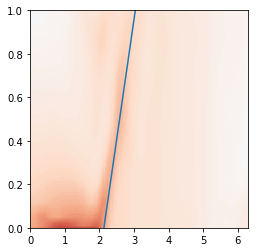

(FloatItem [ 1.276983 -1.342896], tensor([ 1.2770, -1.3429]), tensor([ 1.2770, -1.3429]))


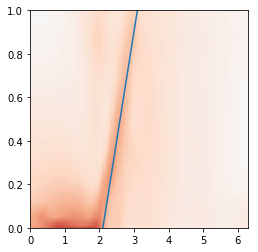

(FloatItem [ 1.156271 -1.213364], tensor([ 1.1563, -1.2134]), tensor([ 1.1563, -1.2134]))


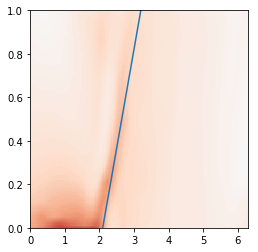

(FloatItem [ 1.314038 -1.371574], tensor([ 1.3140, -1.3716]), tensor([ 1.3140, -1.3716]))


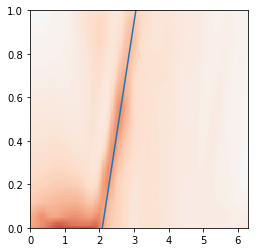

(FloatItem [ 1.216984 -1.260548], tensor([ 1.2170, -1.2605]), tensor([ 1.2170, -1.2605]))


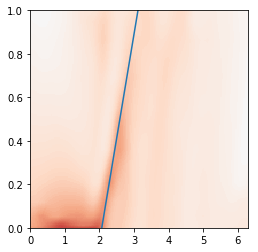

(FloatItem [ 1.2476   -1.300485], tensor([ 1.2476, -1.3005]), tensor([ 1.2476, -1.3005]))


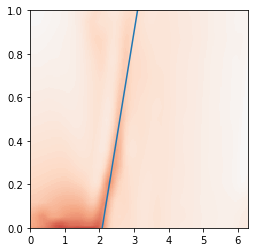

(FloatItem [ 1.125024 -1.191866], tensor([ 1.1250, -1.1919]), tensor([ 1.1250, -1.1919]))


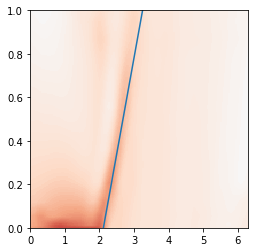

(FloatItem [ 1.168298 -1.212925], tensor([ 1.1683, -1.2129]), tensor([ 1.1683, -1.2129]))


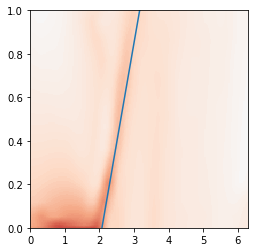

(FloatItem [ 1.199809 -1.261215], tensor([ 1.1998, -1.2612]), tensor([ 1.1998, -1.2612]))


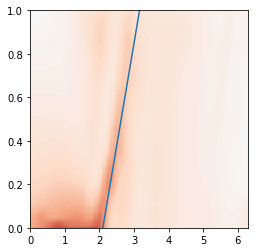

(FloatItem [ 1.122085 -1.158991], tensor([ 1.1221, -1.1590]), tensor([ 1.1221, -1.1590]))


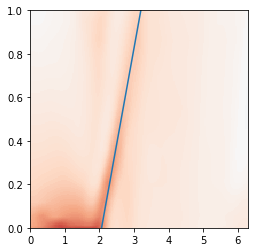

(FloatItem [ 1.181113 -1.201758], tensor([ 1.1811, -1.2018]), tensor([ 1.1811, -1.2018]))


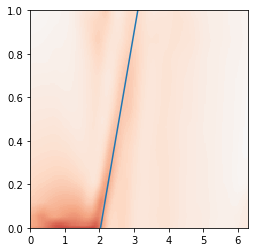

(FloatItem [ 1.249601 -1.299492], tensor([ 1.2496, -1.2995]), tensor([ 1.2496, -1.2995]))


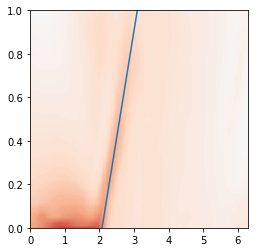

(FloatItem [ 1.20035 -1.25618], tensor([ 1.2003, -1.2562]), tensor([ 1.2003, -1.2562]))


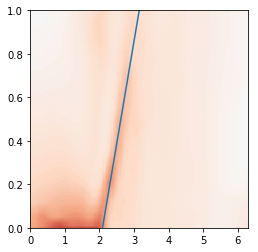

(FloatItem [ 1.320193 -1.416894], tensor([ 1.3202, -1.4169]), tensor([ 1.3202, -1.4169]))


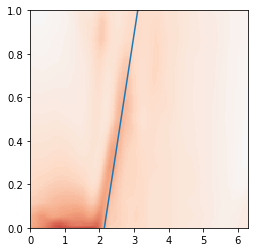

(FloatItem [ 1.400051 -1.494401], tensor([ 1.4001, -1.4944]), tensor([ 1.4001, -1.4944]))


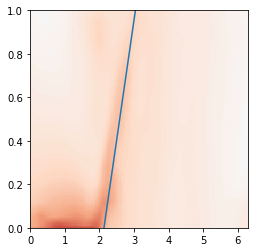

(FloatItem [ 1.284986 -1.368299], tensor([ 1.2850, -1.3683]), tensor([ 1.2850, -1.3683]))


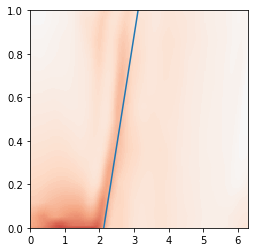

(FloatItem [ 1.362131 -1.470647], tensor([ 1.3621, -1.4706]), tensor([ 1.3621, -1.4706]))


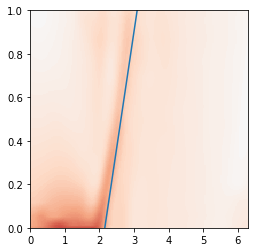

(FloatItem [ 1.352178 -1.420261], tensor([ 1.3522, -1.4203]), tensor([ 1.3522, -1.4203]))


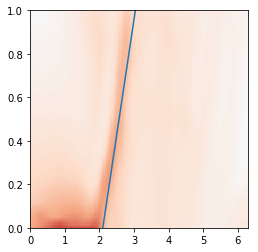

(FloatItem [ 1.288786 -1.341909], tensor([ 1.2888, -1.3419]), tensor([ 1.2888, -1.3419]))


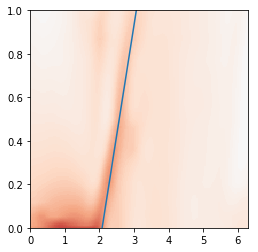

(FloatItem [ 1.174634 -1.250125], tensor([ 1.1746, -1.2501]), tensor([ 1.1746, -1.2501]))


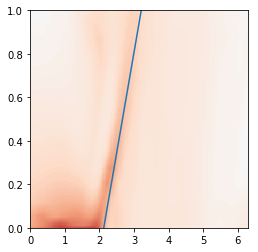

(FloatItem [ 1.297727 -1.346866], tensor([ 1.2977, -1.3469]), tensor([ 1.2977, -1.3469]))


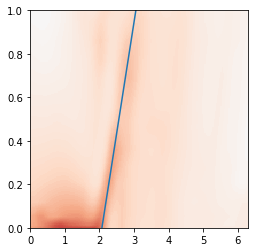

(FloatItem [ 1.253677 -1.312204], tensor([ 1.2537, -1.3122]), tensor([ 1.2537, -1.3122]))


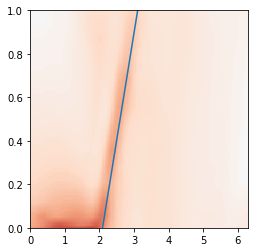

(FloatItem [ 1.31232  -1.358542], tensor([ 1.3123, -1.3585]), tensor([ 1.3123, -1.3585]))


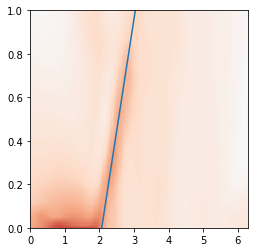

(FloatItem [ 1.1543   -1.186409], tensor([ 1.1543, -1.1864]), tensor([ 1.1543, -1.1864]))


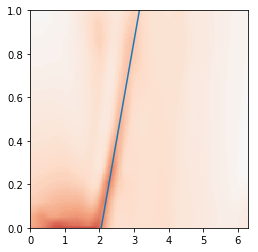

(FloatItem [ 1.29256  -1.371327], tensor([ 1.2926, -1.3713]), tensor([ 1.2926, -1.3713]))


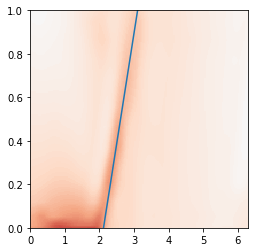

(FloatItem [ 1.326463 -1.404982], tensor([ 1.3265, -1.4050]), tensor([ 1.3265, -1.4050]))


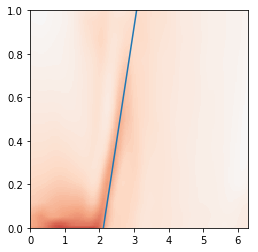

(FloatItem [ 1.153787 -1.201248], tensor([ 1.1538, -1.2012]), tensor([ 1.1538, -1.2012]))


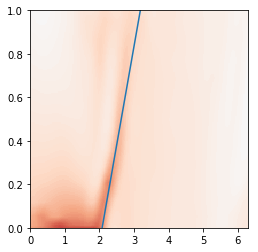

(FloatItem [ 1.334134 -1.407261], tensor([ 1.3341, -1.4073]), tensor([ 1.3341, -1.4073]))


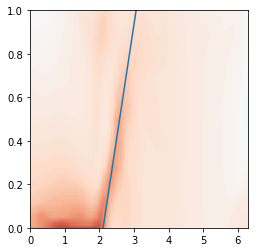

(FloatItem [ 1.353146 -1.446661], tensor([ 1.3531, -1.4467]), tensor([ 1.3531, -1.4467]))


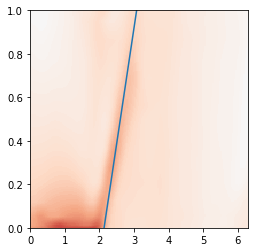

(FloatItem [ 1.353566 -1.425839], tensor([ 1.3536, -1.4258]), tensor([ 1.3536, -1.4258]))


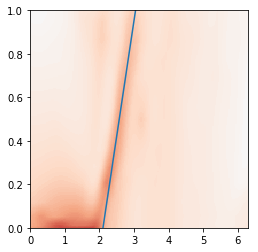

(FloatItem [ 1.214967 -1.262114], tensor([ 1.2150, -1.2621]), tensor([ 1.2150, -1.2621]))


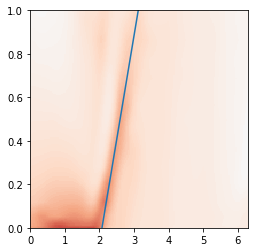

(FloatItem [ 1.371935 -1.452437], tensor([ 1.3719, -1.4524]), tensor([ 1.3719, -1.4524]))


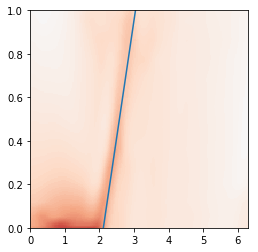

(FloatItem [ 1.200127 -1.268508], tensor([ 1.2001, -1.2685]), tensor([ 1.2001, -1.2685]))


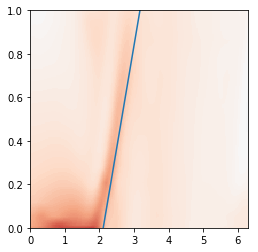

(FloatItem [ 1.230706 -1.283036], tensor([ 1.2307, -1.2830]), tensor([ 1.2307, -1.2830]))


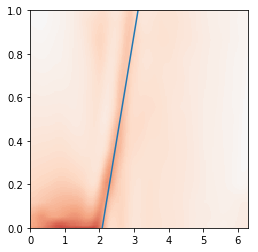

(FloatItem [ 1.182279 -1.20857 ], tensor([ 1.1823, -1.2086]), tensor([ 1.1823, -1.2086]))


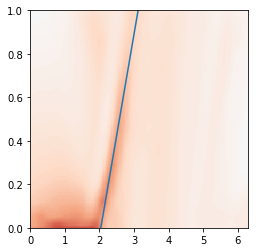

(FloatItem [ 1.296397 -1.342369], tensor([ 1.2964, -1.3424]), tensor([ 1.2964, -1.3424]))


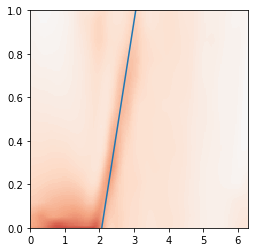

(FloatItem [ 1.228948 -1.303885], tensor([ 1.2289, -1.3039]), tensor([ 1.2289, -1.3039]))


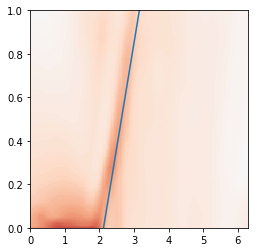

(FloatItem [ 1.33336  -1.442066], tensor([ 1.3334, -1.4421]), tensor([ 1.3334, -1.4421]))


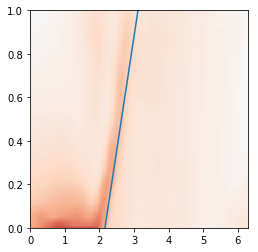

(FloatItem [ 1.26516  -1.325065], tensor([ 1.2652, -1.3251]), tensor([ 1.2652, -1.3251]))


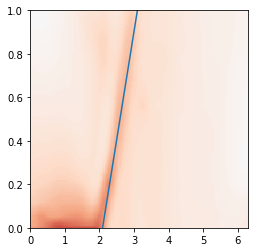

(FloatItem [ 1.161223 -1.201922], tensor([ 1.1612, -1.2019]), tensor([ 1.1612, -1.2019]))


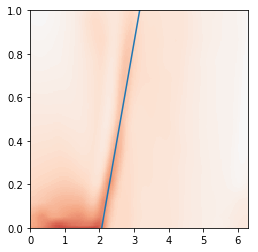

(FloatItem [ 1.384367 -1.45784 ], tensor([ 1.3844, -1.4578]), tensor([ 1.3844, -1.4578]))


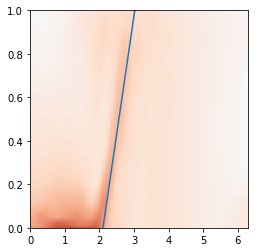

(FloatItem [ 1.243338 -1.310155], tensor([ 1.2433, -1.3102]), tensor([ 1.2433, -1.3102]))


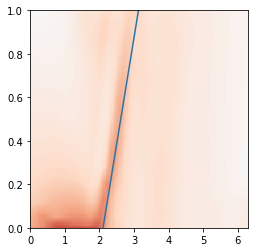

(FloatItem [ 1.653811 -1.766192], tensor([ 1.6538, -1.7662]), tensor([ 1.6538, -1.7662]))


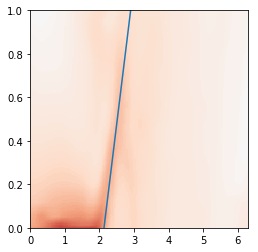

(FloatItem [ 1.256289 -1.330131], tensor([ 1.2563, -1.3301]), tensor([ 1.2563, -1.3301]))


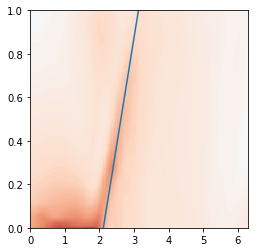

(FloatItem [ 1.288113 -1.351049], tensor([ 1.2881, -1.3510]), tensor([ 1.2881, -1.3510]))


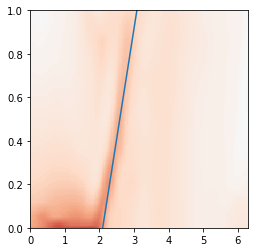

(FloatItem [ 1.488475 -1.597969], tensor([ 1.4885, -1.5980]), tensor([ 1.4885, -1.5980]))


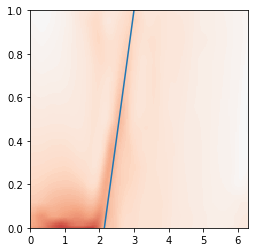

(FloatItem [ 1.265669 -1.312211], tensor([ 1.2657, -1.3122]), tensor([ 1.2657, -1.3122]))


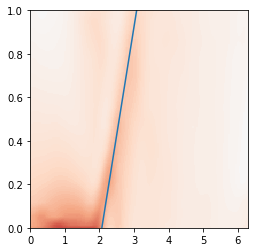

(FloatItem [ 1.181717 -1.242859], tensor([ 1.1817, -1.2429]), tensor([ 1.1817, -1.2429]))


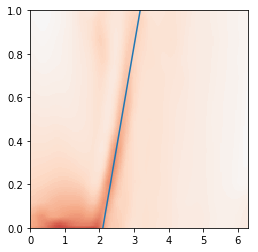

(FloatItem [ 1.217977 -1.250336], tensor([ 1.2180, -1.2503]), tensor([ 1.2180, -1.2503]))


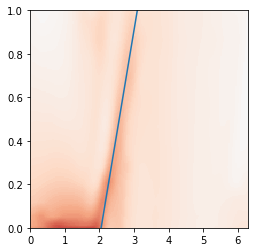

(FloatItem [ 1.208472 -1.261877], tensor([ 1.2085, -1.2619]), tensor([ 1.2085, -1.2619]))


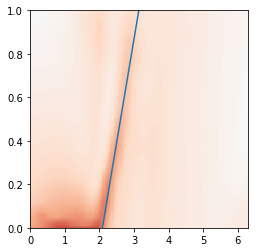

(FloatItem [ 1.219172 -1.256255], tensor([ 1.2192, -1.2563]), tensor([ 1.2192, -1.2563]))


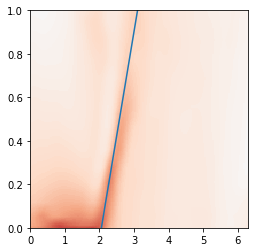

(FloatItem [ 1.201568 -1.244222], tensor([ 1.2016, -1.2442]), tensor([ 1.2016, -1.2442]))


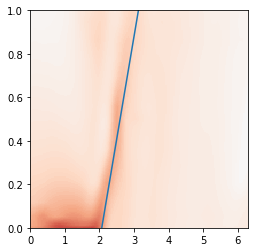

(FloatItem [ 1.305354 -1.383729], tensor([ 1.3054, -1.3837]), tensor([ 1.3054, -1.3837]))


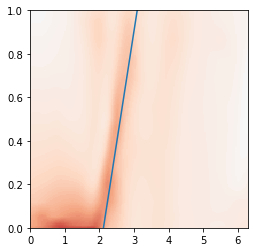

(FloatItem [ 1.161282 -1.228098], tensor([ 1.1613, -1.2281]), tensor([ 1.1613, -1.2281]))


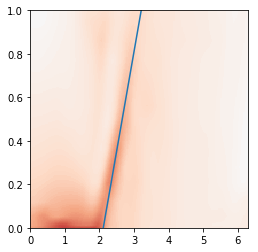

(FloatItem [ 1.358564 -1.41528 ], tensor([ 1.3586, -1.4153]), tensor([ 1.3586, -1.4153]))


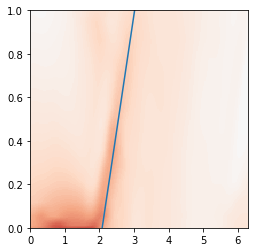

(FloatItem [ 1.296068 -1.328635], tensor([ 1.2961, -1.3286]), tensor([ 1.2961, -1.3286]))


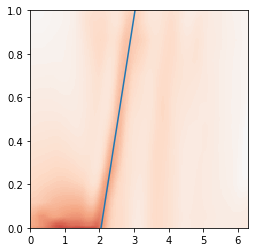

(FloatItem [ 1.126311 -1.148902], tensor([ 1.1263, -1.1489]), tensor([ 1.1263, -1.1489]))


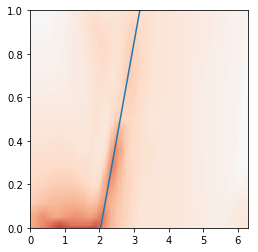

(FloatItem [ 1.187739 -1.255077], tensor([ 1.1877, -1.2551]), tensor([ 1.1877, -1.2551]))


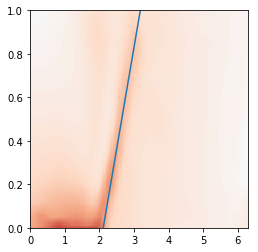

(FloatItem [ 1.126013 -1.17355 ], tensor([ 1.1260, -1.1736]), tensor([ 1.1260, -1.1736]))


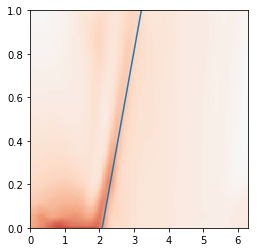

(FloatItem [ 1.172847 -1.263709], tensor([ 1.1728, -1.2637]), tensor([ 1.1728, -1.2637]))


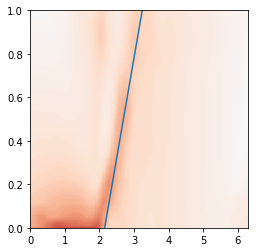

(FloatItem [ 1.286875 -1.351353], tensor([ 1.2869, -1.3514]), tensor([ 1.2869, -1.3514]))


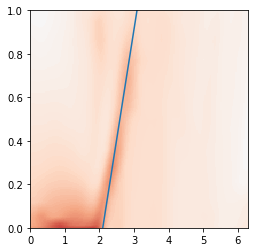

(FloatItem [ 1.315133 -1.416133], tensor([ 1.3151, -1.4161]), tensor([ 1.3151, -1.4161]))


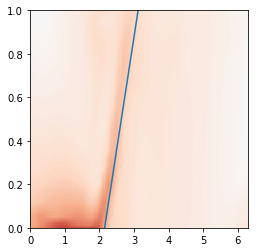

(FloatItem [ 1.188932 -1.235261], tensor([ 1.1889, -1.2353]), tensor([ 1.1889, -1.2353]))


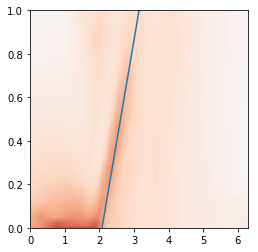

(FloatItem [ 1.291762 -1.345564], tensor([ 1.2918, -1.3456]), tensor([ 1.2918, -1.3456]))


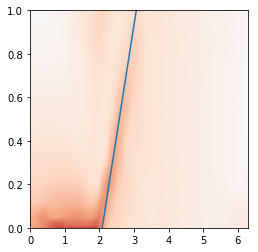

(FloatItem [ 1.305498 -1.367557], tensor([ 1.3055, -1.3676]), tensor([ 1.3055, -1.3676]))


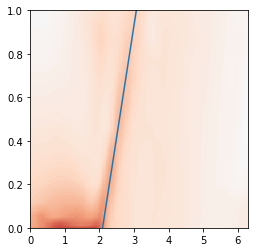

(FloatItem [ 1.35945  -1.421704], tensor([ 1.3594, -1.4217]), tensor([ 1.3594, -1.4217]))


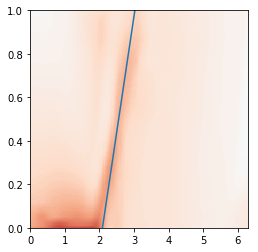

(FloatItem [ 1.294946 -1.351785], tensor([ 1.2949, -1.3518]), tensor([ 1.2949, -1.3518]))


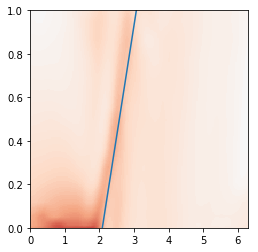

(FloatItem [ 1.301467 -1.382468], tensor([ 1.3015, -1.3825]), tensor([ 1.3015, -1.3825]))


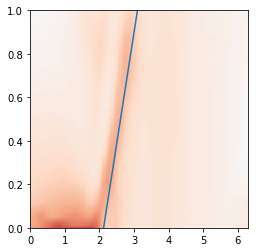

(FloatItem [ 1.292521 -1.331333], tensor([ 1.2925, -1.3313]), tensor([ 1.2925, -1.3313]))


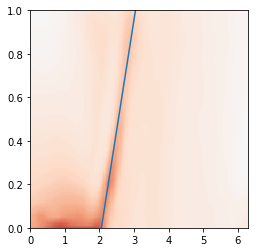

(FloatItem [ 1.199718 -1.241991], tensor([ 1.1997, -1.2420]), tensor([ 1.1997, -1.2420]))


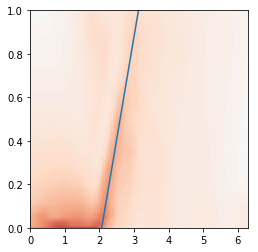

(FloatItem [ 1.379909 -1.479963], tensor([ 1.3799, -1.4800]), tensor([ 1.3799, -1.4800]))


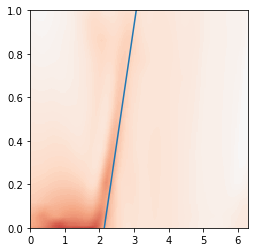

(FloatItem [ 1.390705 -1.480435], tensor([ 1.3907, -1.4804]), tensor([ 1.3907, -1.4804]))


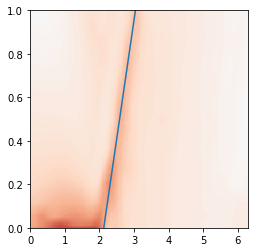

(FloatItem [ 1.317785 -1.421191], tensor([ 1.3178, -1.4212]), tensor([ 1.3178, -1.4212]))


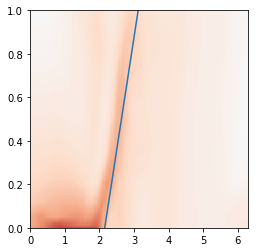

(FloatItem [ 1.267286 -1.369697], tensor([ 1.2673, -1.3697]), tensor([ 1.2673, -1.3697]))


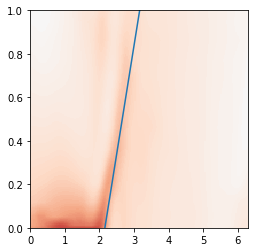

(FloatItem [ 1.376325 -1.447101], tensor([ 1.3763, -1.4471]), tensor([ 1.3763, -1.4471]))


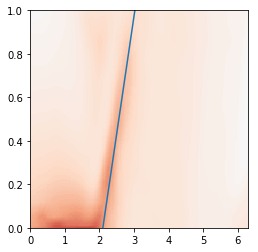

(FloatItem [ 1.348399 -1.423184], tensor([ 1.3484, -1.4232]), tensor([ 1.3484, -1.4232]))


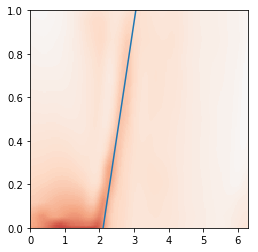

(FloatItem [ 1.213697 -1.261511], tensor([ 1.2137, -1.2615]), tensor([ 1.2137, -1.2615]))


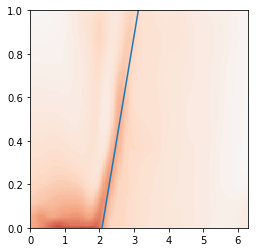

(FloatItem [ 1.287965 -1.360456], tensor([ 1.2880, -1.3605]), tensor([ 1.2880, -1.3605]))


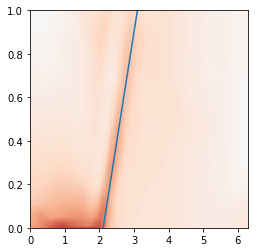

(FloatItem [ 1.119795 -1.1578  ], tensor([ 1.1198, -1.1578]), tensor([ 1.1198, -1.1578]))


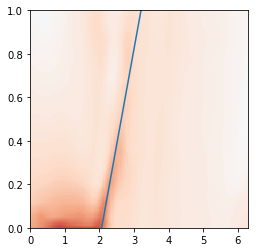

(FloatItem [ 1.232742 -1.300938], tensor([ 1.2327, -1.3009]), tensor([ 1.2327, -1.3009]))


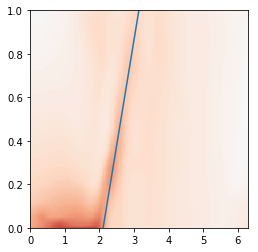

(FloatItem [ 1.128232 -1.172818], tensor([ 1.1282, -1.1728]), tensor([ 1.1282, -1.1728]))


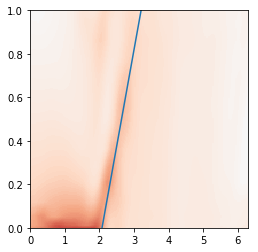

(FloatItem [ 1.313451 -1.3963  ], tensor([ 1.3135, -1.3963]), tensor([ 1.3135, -1.3963]))


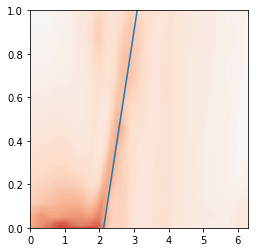

(FloatItem [ 1.272797 -1.366058], tensor([ 1.2728, -1.3661]), tensor([ 1.2728, -1.3661]))


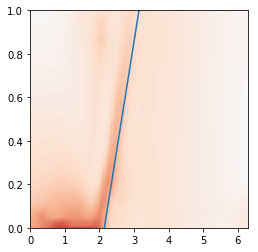

(FloatItem [ 1.208763 -1.280103], tensor([ 1.2088, -1.2801]), tensor([ 1.2088, -1.2801]))


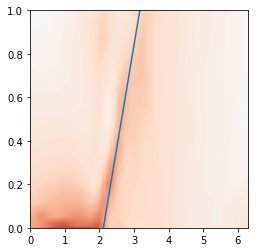

(FloatItem [ 1.145331 -1.188559], tensor([ 1.1453, -1.1886]), tensor([ 1.1453, -1.1886]))


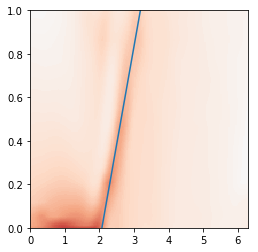

(FloatItem [ 1.199619 -1.214647], tensor([ 1.1996, -1.2146]), tensor([ 1.1996, -1.2146]))


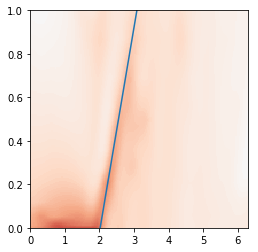

(FloatItem [ 1.388869 -1.488033], tensor([ 1.3889, -1.4880]), tensor([ 1.3889, -1.4880]))


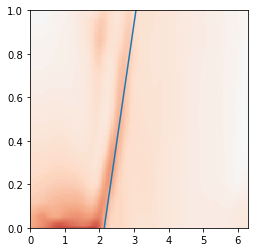

(FloatItem [ 1.259703 -1.335592], tensor([ 1.2597, -1.3356]), tensor([ 1.2597, -1.3356]))


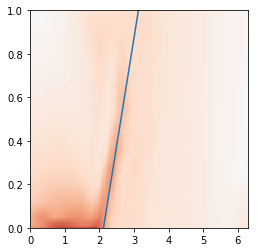

(FloatItem [ 1.29287  -1.378444], tensor([ 1.2929, -1.3784]), tensor([ 1.2929, -1.3784]))


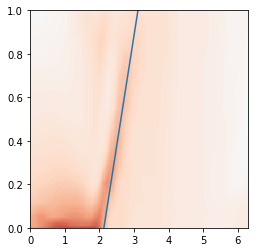

(FloatItem [ 1.06004  -1.096833], tensor([ 1.0600, -1.0968]), tensor([ 1.0600, -1.0968]))


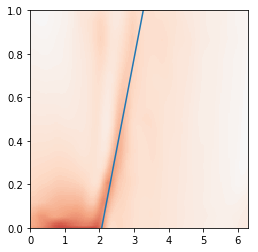

(FloatItem [ 1.193059 -1.228263], tensor([ 1.1931, -1.2283]), tensor([ 1.1931, -1.2283]))


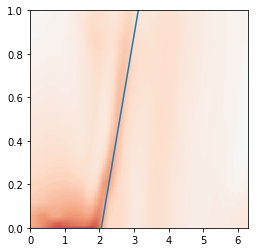

(FloatItem [ 1.410797 -1.504275], tensor([ 1.4108, -1.5043]), tensor([ 1.4108, -1.5043]))


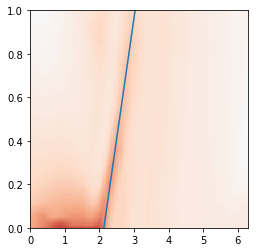

(FloatItem [ 1.166824 -1.225201], tensor([ 1.1668, -1.2252]), tensor([ 1.1668, -1.2252]))


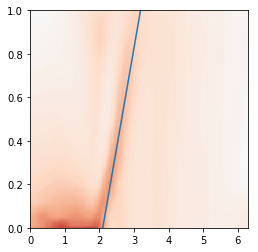

(FloatItem [ 1.289276 -1.356096], tensor([ 1.2893, -1.3561]), tensor([ 1.2893, -1.3561]))


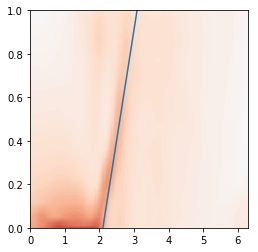

(FloatItem [ 1.174267 -1.242476], tensor([ 1.1743, -1.2425]), tensor([ 1.1743, -1.2425]))


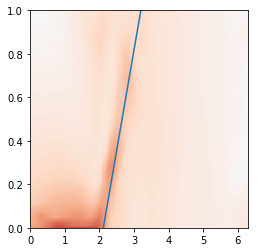

(FloatItem [ 1.286115 -1.321712], tensor([ 1.2861, -1.3217]), tensor([ 1.2861, -1.3217]))


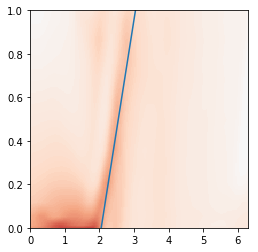

(FloatItem [ 1.298805 -1.364513], tensor([ 1.2988, -1.3645]), tensor([ 1.2988, -1.3645]))


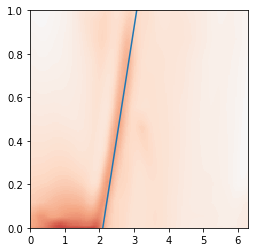

(FloatItem [ 1.145139 -1.19326 ], tensor([ 1.1451, -1.1933]), tensor([ 1.1451, -1.1933]))


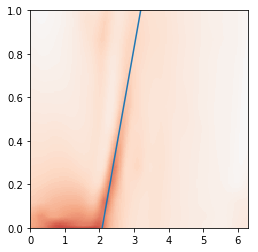

(FloatItem [ 1.233998 -1.270055], tensor([ 1.2340, -1.2701]), tensor([ 1.2340, -1.2701]))


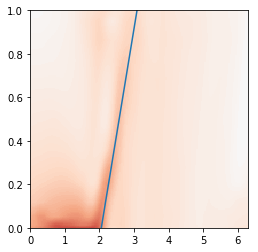

(FloatItem [ 1.270732 -1.310626], tensor([ 1.2707, -1.3106]), tensor([ 1.2707, -1.3106]))


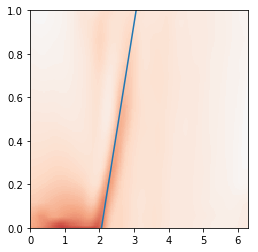

(FloatItem [ 1.185817 -1.238693], tensor([ 1.1858, -1.2387]), tensor([ 1.1858, -1.2387]))


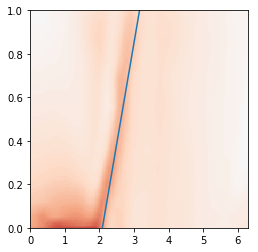

(FloatItem [ 1.263376 -1.342763], tensor([ 1.2634, -1.3428]), tensor([ 1.2634, -1.3428]))


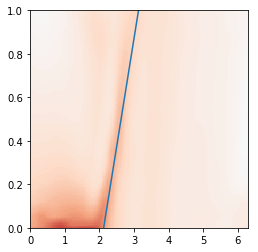

(FloatItem [ 1.119112 -1.149131], tensor([ 1.1191, -1.1491]), tensor([ 1.1191, -1.1491]))


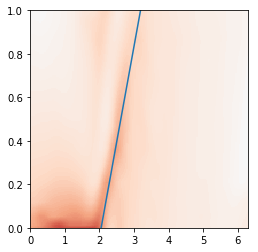

(FloatItem [ 1.199622 -1.248826], tensor([ 1.1996, -1.2488]), tensor([ 1.1996, -1.2488]))


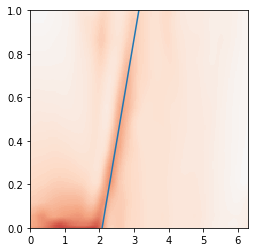

(FloatItem [ 1.333651 -1.419983], tensor([ 1.3337, -1.4200]), tensor([ 1.3337, -1.4200]))


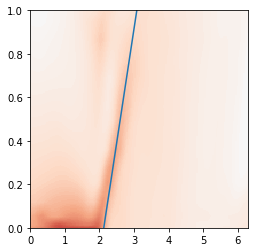

(FloatItem [ 1.140224 -1.183241], tensor([ 1.1402, -1.1832]), tensor([ 1.1402, -1.1832]))


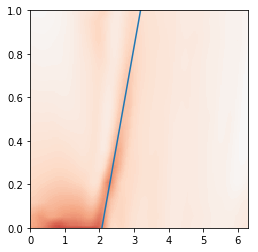

(FloatItem [ 1.215317 -1.272173], tensor([ 1.2153, -1.2722]), tensor([ 1.2153, -1.2722]))


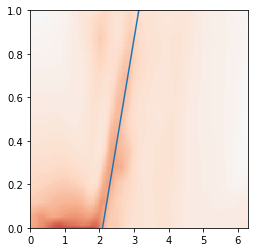

(FloatItem [ 1.248243 -1.312554], tensor([ 1.2482, -1.3126]), tensor([ 1.2482, -1.3126]))


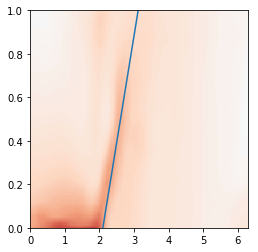

(FloatItem [ 1.208859 -1.234337], tensor([ 1.2089, -1.2343]), tensor([ 1.2089, -1.2343]))


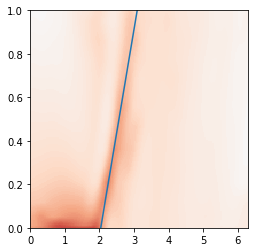

(FloatItem [ 1.172173 -1.204423], tensor([ 1.1722, -1.2044]), tensor([ 1.1722, -1.2044]))


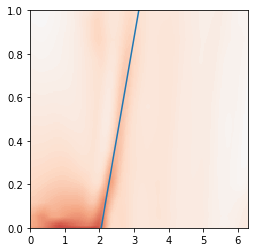

(FloatItem [ 1.337707 -1.419232], tensor([ 1.3377, -1.4192]), tensor([ 1.3377, -1.4192]))


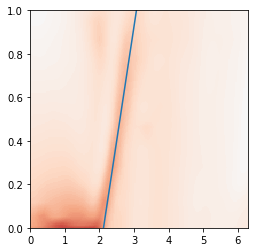

(FloatItem [ 1.302428 -1.357078], tensor([ 1.3024, -1.3571]), tensor([ 1.3024, -1.3571]))


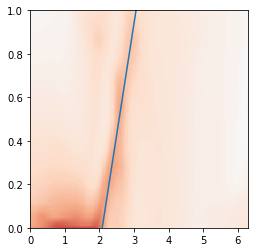

(FloatItem [ 1.313051 -1.381422], tensor([ 1.3131, -1.3814]), tensor([ 1.3131, -1.3814]))


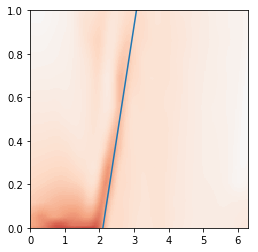

(FloatItem [ 1.291828 -1.363132], tensor([ 1.2918, -1.3631]), tensor([ 1.2918, -1.3631]))


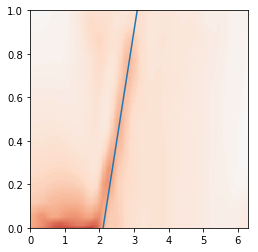

(FloatItem [ 1.489756 -1.584648], tensor([ 1.4898, -1.5846]), tensor([ 1.4898, -1.5846]))


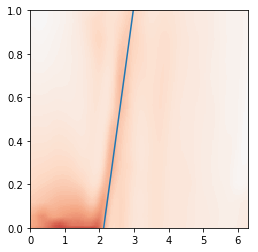

(FloatItem [ 1.208126 -1.259145], tensor([ 1.2081, -1.2591]), tensor([ 1.2081, -1.2591]))


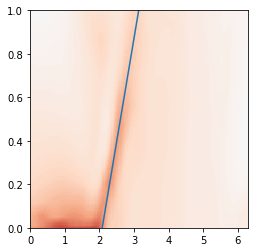

(FloatItem [ 1.293464 -1.375002], tensor([ 1.2935, -1.3750]), tensor([ 1.2935, -1.3750]))


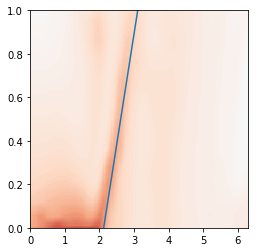

(FloatItem [ 1.319941 -1.404414], tensor([ 1.3199, -1.4044]), tensor([ 1.3199, -1.4044]))


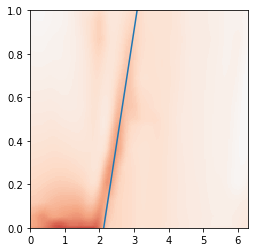

(FloatItem [ 1.111512 -1.112644], tensor([ 1.1115, -1.1126]), tensor([ 1.1115, -1.1126]))


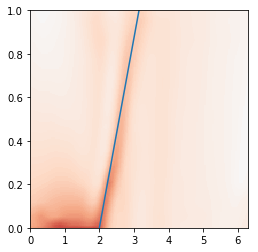

(FloatItem [ 1.104584 -1.143008], tensor([ 1.1046, -1.1430]), tensor([ 1.1046, -1.1430]))


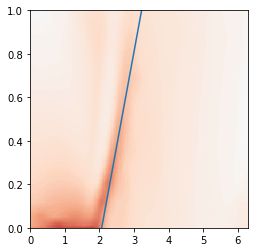

(FloatItem [ 1.154803 -1.20797 ], tensor([ 1.1548, -1.2080]), tensor([ 1.1548, -1.2080]))


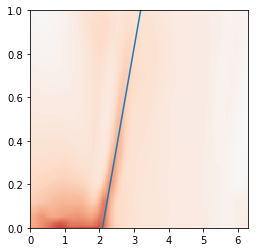

(FloatItem [ 1.232463 -1.32053 ], tensor([ 1.2325, -1.3205]), tensor([ 1.2325, -1.3205]))


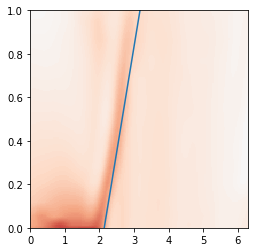

(FloatItem [ 1.274923 -1.347011], tensor([ 1.2749, -1.3470]), tensor([ 1.2749, -1.3470]))


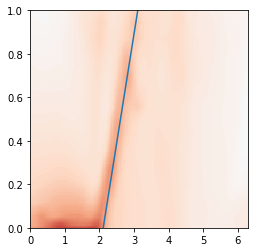

(FloatItem [ 1.144903 -1.192831], tensor([ 1.1449, -1.1928]), tensor([ 1.1449, -1.1928]))


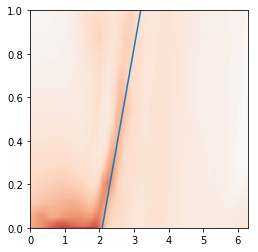

(FloatItem [ 1.421352 -1.499174], tensor([ 1.4214, -1.4992]), tensor([ 1.4214, -1.4992]))


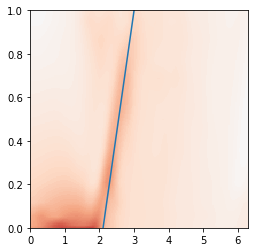

(FloatItem [ 1.1344   -1.195757], tensor([ 1.1344, -1.1958]), tensor([ 1.1344, -1.1958]))


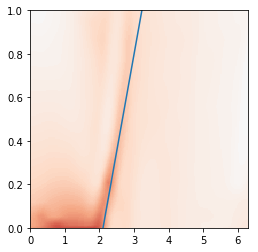

(FloatItem [ 1.094065 -1.152554], tensor([ 1.0941, -1.1526]), tensor([ 1.0941, -1.1526]))


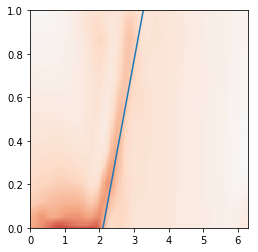

(FloatItem [ 1.188103 -1.241982], tensor([ 1.1881, -1.2420]), tensor([ 1.1881, -1.2420]))


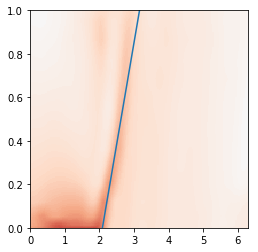

(FloatItem [ 1.250655 -1.309337], tensor([ 1.2507, -1.3093]), tensor([ 1.2507, -1.3093]))


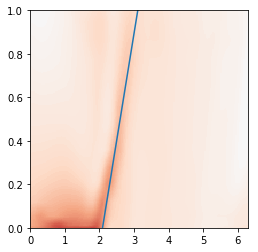

(FloatItem [ 1.422745 -1.496854], tensor([ 1.4227, -1.4969]), tensor([ 1.4227, -1.4969]))


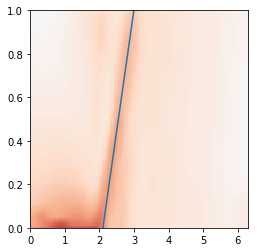

(FloatItem [ 1.374562 -1.438565], tensor([ 1.3746, -1.4386]), tensor([ 1.3746, -1.4386]))


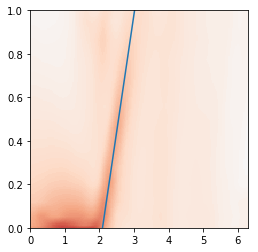

(FloatItem [ 1.271879 -1.325506], tensor([ 1.2719, -1.3255]), tensor([ 1.2719, -1.3255]))


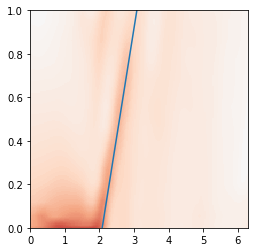

(FloatItem [ 1.26874  -1.325673], tensor([ 1.2687, -1.3257]), tensor([ 1.2687, -1.3257]))


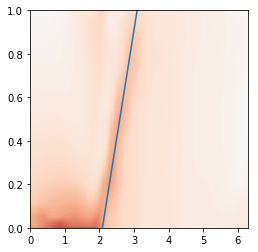

(FloatItem [ 1.31029  -1.405063], tensor([ 1.3103, -1.4051]), tensor([ 1.3103, -1.4051]))


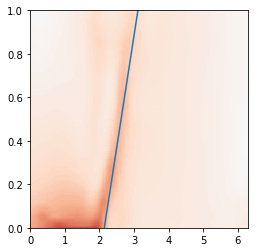

(FloatItem [ 1.178795 -1.264561], tensor([ 1.1788, -1.2646]), tensor([ 1.1788, -1.2646]))


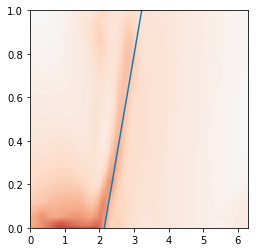

(FloatItem [ 1.357342 -1.455224], tensor([ 1.3573, -1.4552]), tensor([ 1.3573, -1.4552]))


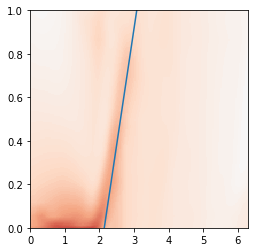

(FloatItem [ 1.251399 -1.316986], tensor([ 1.2514, -1.3170]), tensor([ 1.2514, -1.3170]))


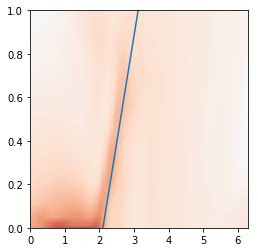

(FloatItem [ 1.31004 -1.37289], tensor([ 1.3100, -1.3729]), tensor([ 1.3100, -1.3729]))


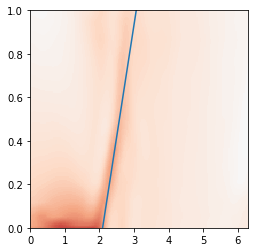

(FloatItem [ 1.194559 -1.262635], tensor([ 1.1946, -1.2626]), tensor([ 1.1946, -1.2626]))


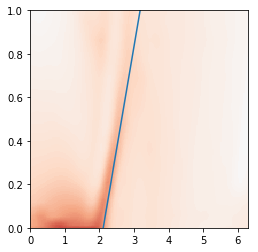

(FloatItem [ 1.237154 -1.307813], tensor([ 1.2372, -1.3078]), tensor([ 1.2372, -1.3078]))


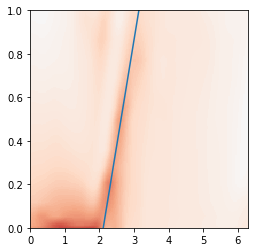

(FloatItem [ 1.294132 -1.335014], tensor([ 1.2941, -1.3350]), tensor([ 1.2941, -1.3350]))


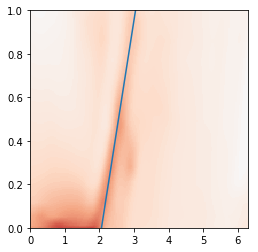

(FloatItem [ 1.27618  -1.340183], tensor([ 1.2762, -1.3402]), tensor([ 1.2762, -1.3402]))


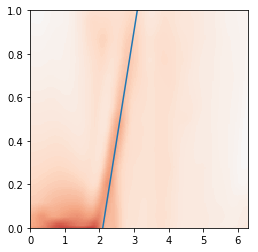

(FloatItem [ 1.221659 -1.27679 ], tensor([ 1.2217, -1.2768]), tensor([ 1.2217, -1.2768]))


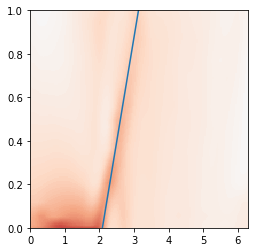

(FloatItem [ 1.40683  -1.483839], tensor([ 1.4068, -1.4838]), tensor([ 1.4068, -1.4838]))


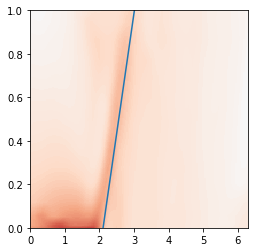

(FloatItem [ 1.316169 -1.376745], tensor([ 1.3162, -1.3767]), tensor([ 1.3162, -1.3767]))


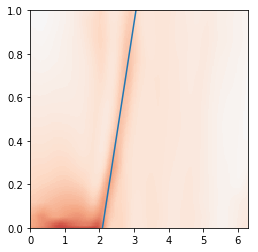

(FloatItem [ 1.240818 -1.274599], tensor([ 1.2408, -1.2746]), tensor([ 1.2408, -1.2746]))


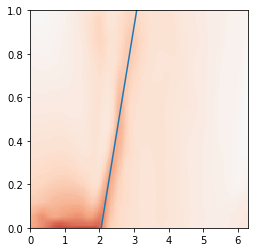

(FloatItem [ 1.085913 -1.094644], tensor([ 1.0859, -1.0946]), tensor([ 1.0859, -1.0946]))


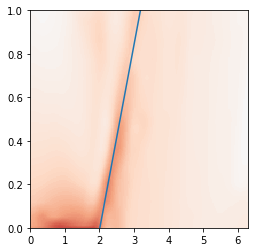

(FloatItem [ 1.488521 -1.572233], tensor([ 1.4885, -1.5722]), tensor([ 1.4885, -1.5722]))


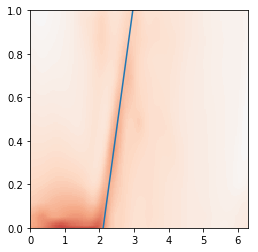

(FloatItem [ 1.108016 -1.179676], tensor([ 1.1080, -1.1797]), tensor([ 1.1080, -1.1797]))


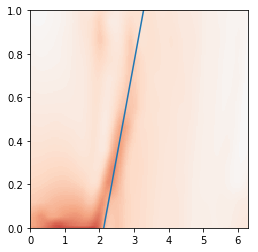

(FloatItem [ 1.170969 -1.247012], tensor([ 1.1710, -1.2470]), tensor([ 1.1710, -1.2470]))


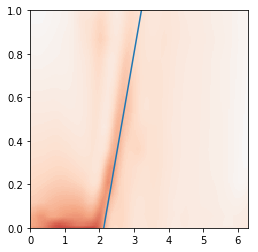

(FloatItem [ 1.357268 -1.447679], tensor([ 1.3573, -1.4477]), tensor([ 1.3573, -1.4477]))


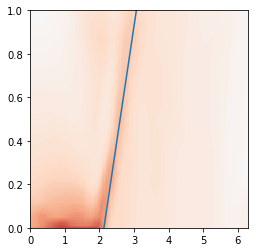

(FloatItem [ 1.351974 -1.438784], tensor([ 1.3520, -1.4388]), tensor([ 1.3520, -1.4388]))


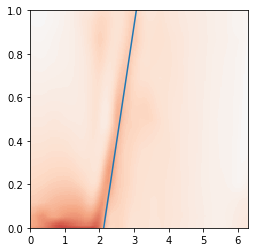

(FloatItem [ 1.244516 -1.314147], tensor([ 1.2445, -1.3141]), tensor([ 1.2445, -1.3141]))


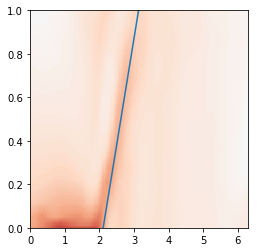

(FloatItem [ 1.227197 -1.270066], tensor([ 1.2272, -1.2701]), tensor([ 1.2272, -1.2701]))


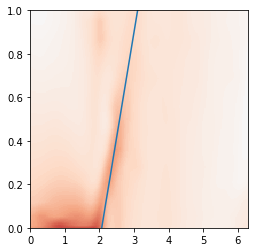

(FloatItem [ 1.368948 -1.460135], tensor([ 1.3689, -1.4601]), tensor([ 1.3689, -1.4601]))


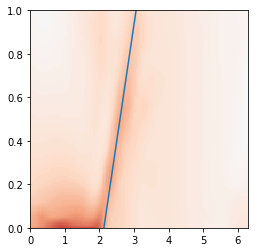

(FloatItem [ 1.323873 -1.394009], tensor([ 1.3239, -1.3940]), tensor([ 1.3239, -1.3940]))


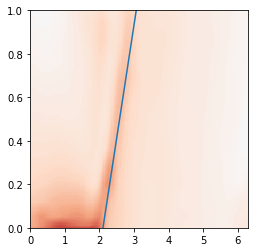

(FloatItem [ 1.092461 -1.119431], tensor([ 1.0925, -1.1194]), tensor([ 1.0925, -1.1194]))


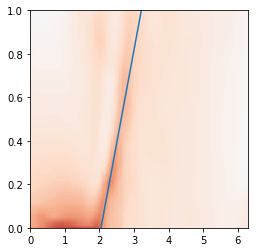

(FloatItem [ 1.248143 -1.315235], tensor([ 1.2481, -1.3152]), tensor([ 1.2481, -1.3152]))


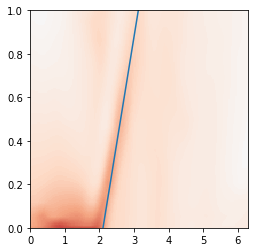

(FloatItem [ 1.177747 -1.202136], tensor([ 1.1777, -1.2021]), tensor([ 1.1777, -1.2021]))


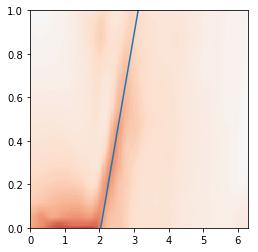

(FloatItem [ 1.224355 -1.274117], tensor([ 1.2244, -1.2741]), tensor([ 1.2244, -1.2741]))


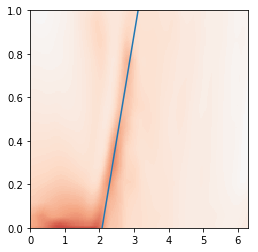

(FloatItem [ 1.228457 -1.309377], tensor([ 1.2285, -1.3094]), tensor([ 1.2285, -1.3094]))


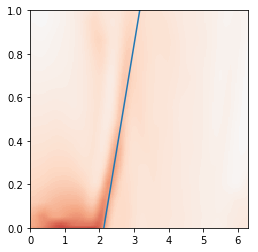

(FloatItem [ 1.257406 -1.318221], tensor([ 1.2574, -1.3182]), tensor([ 1.2574, -1.3182]))


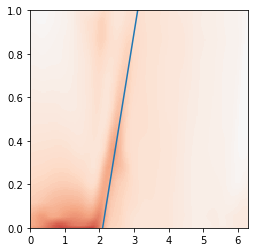

(FloatItem [ 1.215053 -1.251575], tensor([ 1.2151, -1.2516]), tensor([ 1.2151, -1.2516]))


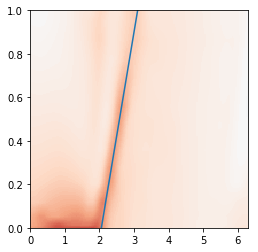

(FloatItem [ 1.262304 -1.339019], tensor([ 1.2623, -1.3390]), tensor([ 1.2623, -1.3390]))


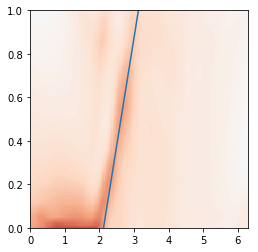

(FloatItem [ 1.143687 -1.172559], tensor([ 1.1437, -1.1726]), tensor([ 1.1437, -1.1726]))


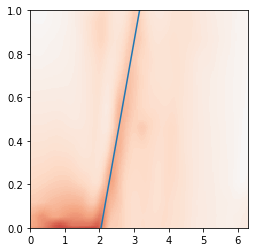

(FloatItem [ 1.29674  -1.386003], tensor([ 1.2967, -1.3860]), tensor([ 1.2967, -1.3860]))


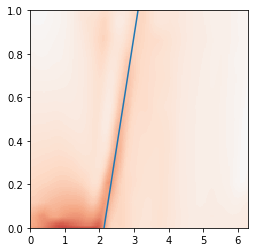

(FloatItem [ 1.16419  -1.209394], tensor([ 1.1642, -1.2094]), tensor([ 1.1642, -1.2094]))


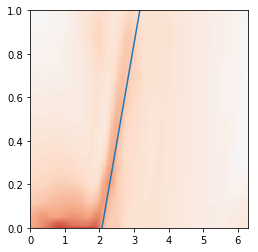

(FloatItem [ 1.145315 -1.185304], tensor([ 1.1453, -1.1853]), tensor([ 1.1453, -1.1853]))


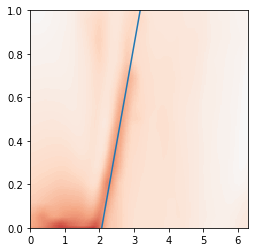

(FloatItem [ 1.238852 -1.289475], tensor([ 1.2389, -1.2895]), tensor([ 1.2389, -1.2895]))


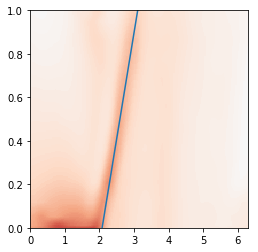

(FloatItem [ 1.277064 -1.318   ], tensor([ 1.2771, -1.3180]), tensor([ 1.2771, -1.3180]))


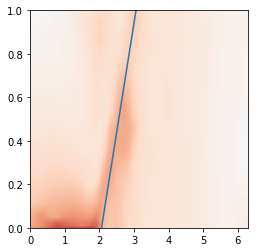

(FloatItem [ 1.308536 -1.385082], tensor([ 1.3085, -1.3851]), tensor([ 1.3085, -1.3851]))


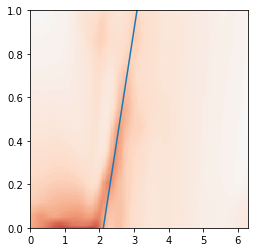

(FloatItem [ 1.392044 -1.496564], tensor([ 1.3920, -1.4966]), tensor([ 1.3920, -1.4966]))


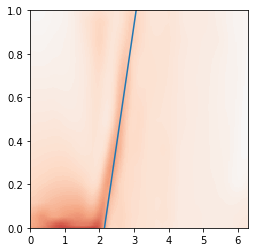

(FloatItem [ 1.246635 -1.312469], tensor([ 1.2466, -1.3125]), tensor([ 1.2466, -1.3125]))


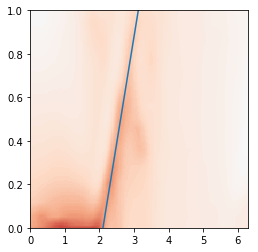

(FloatItem [ 1.219656 -1.277817], tensor([ 1.2197, -1.2778]), tensor([ 1.2197, -1.2778]))


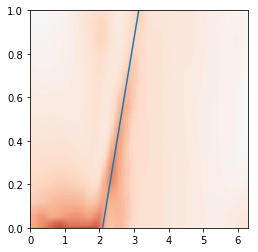

(FloatItem [ 1.19133  -1.223162], tensor([ 1.1913, -1.2232]), tensor([ 1.1913, -1.2232]))


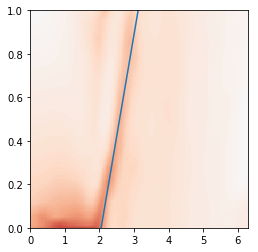

(FloatItem [ 1.118787 -1.134264], tensor([ 1.1188, -1.1343]), tensor([ 1.1188, -1.1343]))


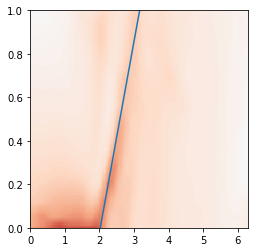

(FloatItem [ 1.065103 -1.102875], tensor([ 1.0651, -1.1029]), tensor([ 1.0651, -1.1029]))


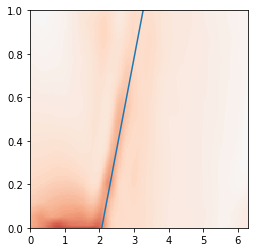

(FloatItem [ 1.358826 -1.416551], tensor([ 1.3588, -1.4166]), tensor([ 1.3588, -1.4166]))


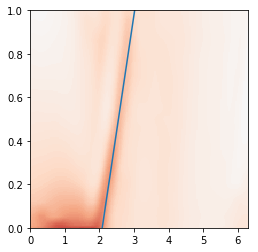

(FloatItem [ 1.441438 -1.496736], tensor([ 1.4414, -1.4967]), tensor([ 1.4414, -1.4967]))


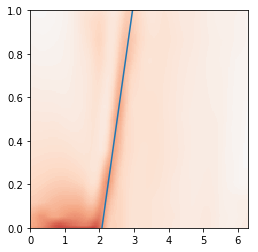

(FloatItem [ 1.208367 -1.266069], tensor([ 1.2084, -1.2661]), tensor([ 1.2084, -1.2661]))


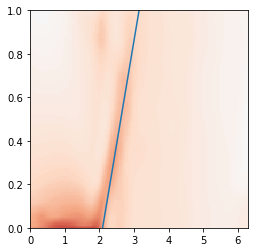

(FloatItem [ 1.397388 -1.478098], tensor([ 1.3974, -1.4781]), tensor([ 1.3974, -1.4781]))


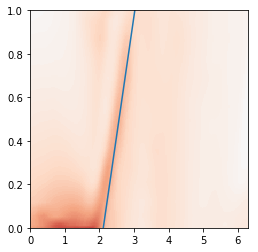

(FloatItem [ 1.365775 -1.442429], tensor([ 1.3658, -1.4424]), tensor([ 1.3658, -1.4424]))


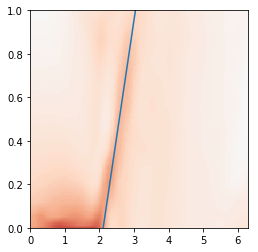

(FloatItem [ 1.201082 -1.245943], tensor([ 1.2011, -1.2459]), tensor([ 1.2011, -1.2459]))


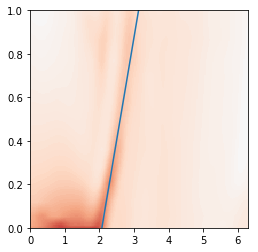

(FloatItem [ 1.166127 -1.212579], tensor([ 1.1661, -1.2126]), tensor([ 1.1661, -1.2126]))


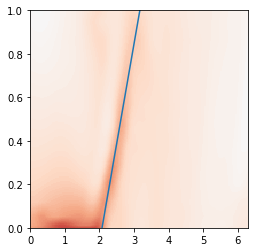

(FloatItem [ 1.440504 -1.51038 ], tensor([ 1.4405, -1.5104]), tensor([ 1.4405, -1.5104]))


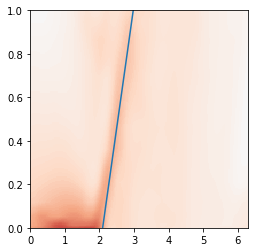

(FloatItem [ 1.191999 -1.202656], tensor([ 1.1920, -1.2027]), tensor([ 1.1920, -1.2027]))


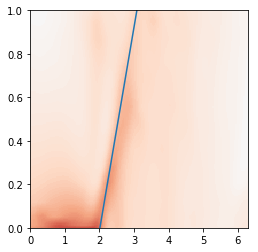

(FloatItem [ 1.435504 -1.520922], tensor([ 1.4355, -1.5209]), tensor([ 1.4355, -1.5209]))


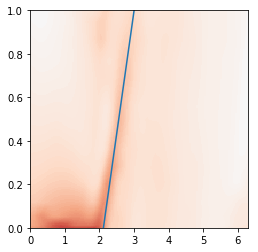

(FloatItem [ 1.255035 -1.316071], tensor([ 1.2550, -1.3161]), tensor([ 1.2550, -1.3161]))


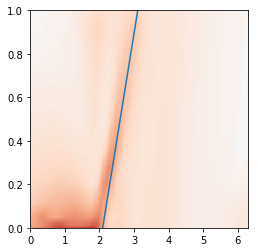

(FloatItem [ 1.091536 -1.121006], tensor([ 1.0915, -1.1210]), tensor([ 1.0915, -1.1210]))


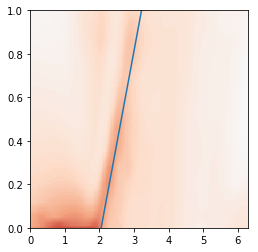

(FloatItem [ 1.283341 -1.347804], tensor([ 1.2833, -1.3478]), tensor([ 1.2833, -1.3478]))


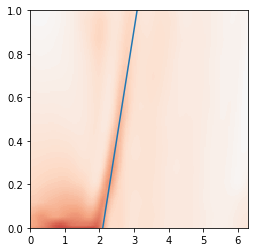

(FloatItem [ 1.17995  -1.225121], tensor([ 1.1799, -1.2251]), tensor([ 1.1799, -1.2251]))


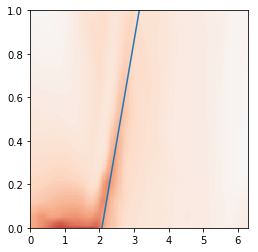

(FloatItem [ 1.100871 -1.158311], tensor([ 1.1009, -1.1583]), tensor([ 1.1009, -1.1583]))


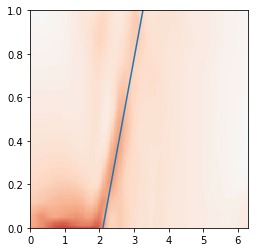

(FloatItem [ 1.091889 -1.102091], tensor([ 1.0919, -1.1021]), tensor([ 1.0919, -1.1021]))


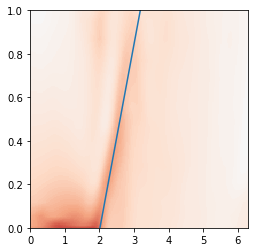

(FloatItem [ 1.266957 -1.319837], tensor([ 1.2670, -1.3198]), tensor([ 1.2670, -1.3198]))


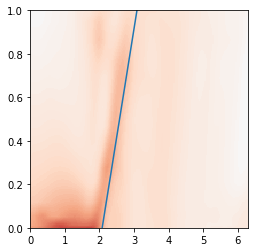

(FloatItem [ 1.354546 -1.489506], tensor([ 1.3545, -1.4895]), tensor([ 1.3545, -1.4895]))


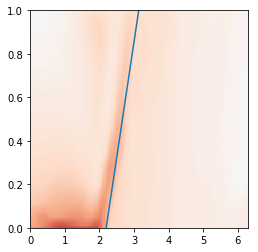

In [77]:
from os import listdir
from os.path import isfile, join
mypath = '/storage/Vortex/Infer/'
onlyfiles = [DisplayResults(f[:-4]) for f in listdir(mypath) if isfile(join(mypath, f))]

In [78]:
Predicted =pd.DataFrame(onlyfiles,columns=['row','m','c'])


In [79]:
Predicted.to_pickle('/storage/Vortex/Predicted/results')